In [1]:
from machine_learning_framework import sigmoid, relu, tanh, gradient_descent, get_one_hot, NeuralNet, StandardScaler, NormalScaler
from utils.metrics import Metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import preprocess
from utils import helpers
import random
import os
import operator
os.chdir('./utils/')
%load_ext autoreload
%autoreload 2

## Optional: re-generate dataset

!!!Warning: This step takes about 12 min!

In [ ]:
features = ["timestamp",
                "right_mouth_z",
                "left_shoulder_z", 
                "right_shoulder_z", 
                "left_elbow_x", "left_elbow_y", "left_elbow_z", 
                "right_elbow_x", "right_elbow_y", "right_elbow_z", 
                "left_thumb_x", "left_thumb_y", "left_thumb_z",
                "right_thumb_x", "right_thumb_y", "right_thumb_z",
                "ground_truth"]
preprocess.preprocess_and_save_data(features)

## Read data

In [2]:
def read_data(subfolder= ""):
    X_train = pd.read_csv(f"preprocessed_data/{subfolder}data_train.csv")
    X_validate = pd.read_csv(f"preprocessed_data/{subfolder}data_validate.csv")
    X_test = pd.read_csv(f"preprocessed_data/{subfolder}data_test.csv")
    y_train = pd.read_csv(f"preprocessed_data/{subfolder}y_train.csv")
    y_validate = pd.read_csv(f"preprocessed_data/{subfolder}y_validate.csv")
    y_test = pd.read_csv(f"preprocessed_data/{subfolder}y_test.csv")

    y_train = pd.get_dummies(y_train).to_numpy()
    y_validate = pd.get_dummies(y_validate).to_numpy()
    y_test = pd.get_dummies(y_test).to_numpy()

    X_train = X_train.to_numpy()
    X_validate = X_validate.to_numpy()
    X_test = X_test.to_numpy()

    scaler = StandardScaler()
    scaler.fit(X_train) # fitting the scaler has to be done only with the training data, because our model should act like it has never seen the validation & test data before it comes up with a trained model
    X_train = scaler.transform(X_train)
    X_validate = scaler.transform(X_validate)
    X_test = scaler.transform(X_test)

    return X_train, X_validate, X_test, y_train, y_validate, y_test

In [ ]:
X_train, X_validate, X_test, y_train, y_validate, y_test = read_data()

In [3]:
def plot_learning_curve(error_history, error_history_validate, title = "", start = 0):
    plt.title(title)
    plt.plot(error_history[start::], label = f"train")
    plt.plot(error_history_validate[start::], label = f"validate")
    print(f"last train error: {error_history[-1]}")
    print(f"last validate error: {error_history_validate[-1]}")
    plt.legend()
    plt.show()

In [4]:
# def accuracy(neural_net, X_validate, Y_validate):
#     prediction = neural_net.predict(X_validate)
#     for i in range(len(prediction)):
#         print("predicted:")
#         print(prediction[i])
#         print("real")
#         print(Y_validate[i])

In [3]:
# def print_metrics(neural_net, x, y):
#     prediction = neural_net.predict(x)
#     y = helpers.interpret_predictions(y)
#     prediction = helpers.interpret_predictions(prediction)
#     metrics = Metrics(prediction, y)
#     #print(metrics.confusion_matrix)
#     #helpers.print_confusion_matrix(prediction, y)
#     #print(metrics.get_confusion_matrix())
#     print(f"accuracy: {metrics.accuracy}")

def print_metrics(neural_net, x, y):
    prediction = neural_net.predict(x)
    interpreted_x = helpers.interpret_predictions(prediction)
    interpreted_y = helpers.interpret_predictions(y)
    metrics = Metrics(prediction, y, interpreted_x, interpreted_y)
    metrics.print_metrics() 

Concept: 
It's useful to tune the learning rate first, because we don't want to think about overshooting too much during the upcoming experimentation. Also we will search for the best activation function at the beginning.


Meaning of NAN in error data: Error is getting bigger that the max number that a float can hold.
see also https://stackoverflow.com/questions/33962226/common-causes-of-nans-during-training-of-neural-networks

# Learning Rate & Iterations

last train error: 1.7878674642788108
last validate error: 3.411550534622333


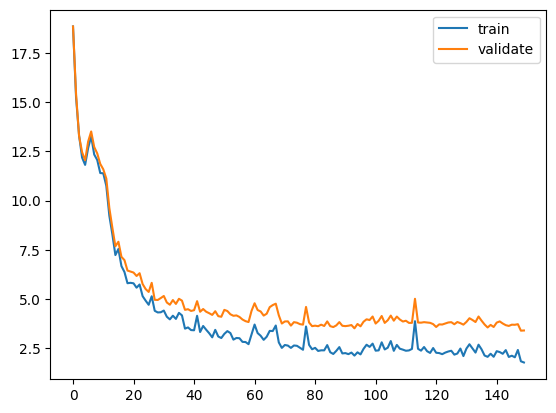

In [5]:
layers_size = [225, 16, 16, 11]

neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION,tanh,gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train, y_train, 0.001, 1500, 0.05, X_validate, y_validate)
plot_learning_curve(error_history, error_history_validate)

This looks pretty good. But let's see what other values for alpha look like. Since it seems to start converging at iteration 600 - 800 we can use that as an iteration value.

accuracy: 0.9014586160108549
last train error: 11.263378723757228
last validate error: 13.617103588510215


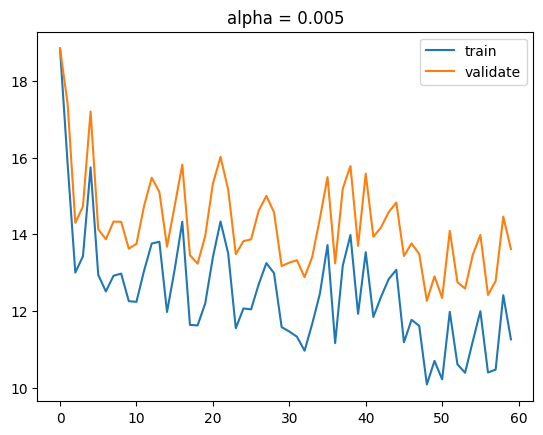

accuracy: 0.9560153776571687
last train error: 6.186195351509756
last validate error: 7.543126204433836


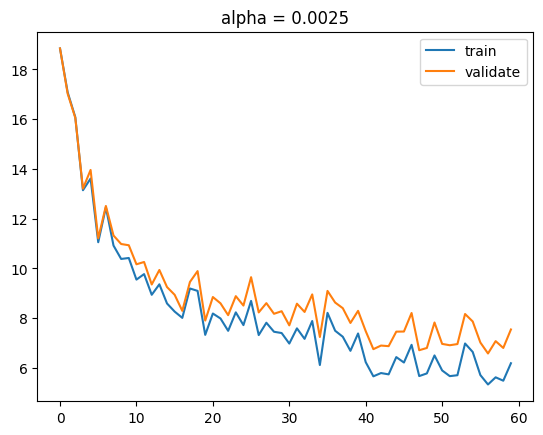

accuracy: 0.9781207598371777
last train error: 2.3715107525748076
last validate error: 3.3536714804197856


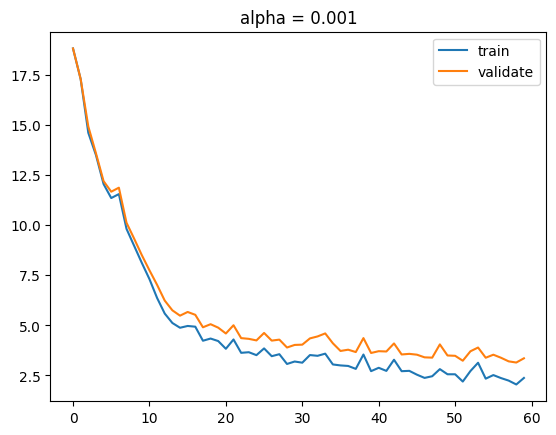

accuracy: 0.9831524197195839
last train error: 1.6060216801039306
last validate error: 2.6650416079650343


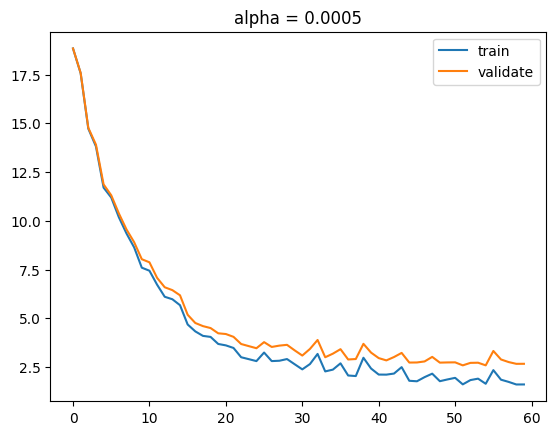

In [22]:
# about 2 min
layers_size = [225, 16, 16, 11]

for i in [0.005, 0.0025, 0.001, 0.0005]:
    neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
    weights, biases, error_history,error_history_validate = neural_net.train(X_train, y_train, i, 600, 0.05, X_validate, y_validate)
    print_metrics(neural_net, X_validate, y_validate)
    plot_learning_curve(error_history, error_history_validate, title=f"alpha = {i}")

A value around 0.0005 seems to have good results (with about 98% accuracy). Can the model get better if we take a value near 0.0005 for the learning rate?

c:\Users\Sophia\AppData\Local\Programs\Python\Python310\lib\site-packages\machine_learning_framework\metrics.py:63: RuntimeWarning: invalid value encountered in long_scalars
  self.precision = np.sum(self.true_positives) / (np.sum(self.true_positives) + np.sum(self.false_positives))
c:\Users\Sophia\AppData\Local\Programs\Python\Python310\lib\site-packages\machine_learning_framework\metrics.py:69: RuntimeWarning: invalid value encountered in long_scalars
  self.recall = np.sum(self.true_positives) / (np.sum(self.true_positives) + np.sum(self.false_negatives))


accuracy: 0.9574853007688828
last train error: 2.5377592107307674
last validate error: 3.158936902631405


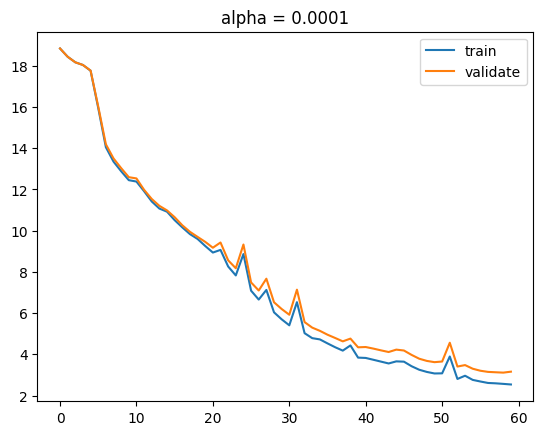

accuracy: 0.9836047037539575
last train error: 1.8974824820417955
last validate error: 2.6713404116402146


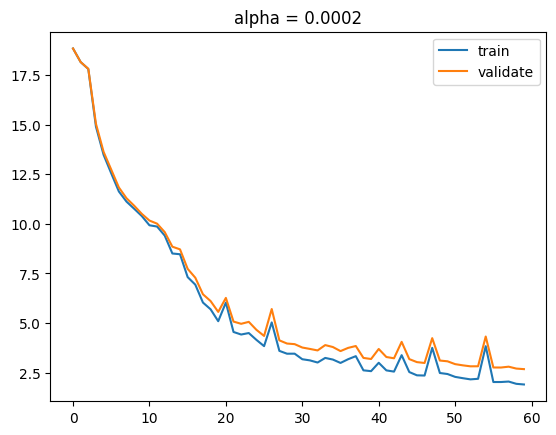

accuracy: 0.9815694255992763
last train error: 1.7307533913735698
last validate error: 2.6431490026458175


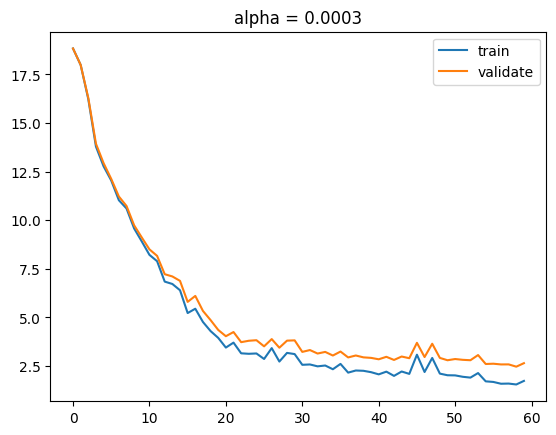

accuracy: 0.98219131614654
last train error: 1.4321955312339656
last validate error: 2.4359172999755216


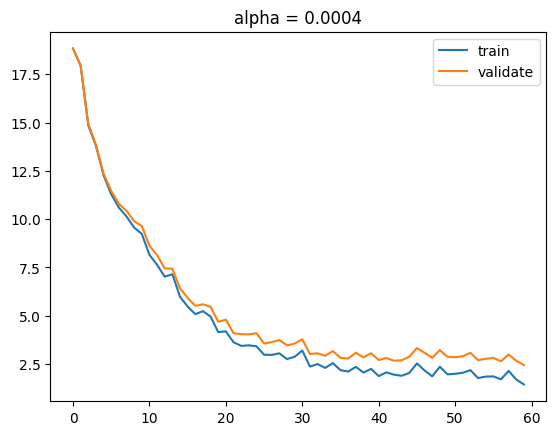

accuracy: 0.9819651741293532
last train error: 1.5366678353530105
last validate error: 2.6417867691043684


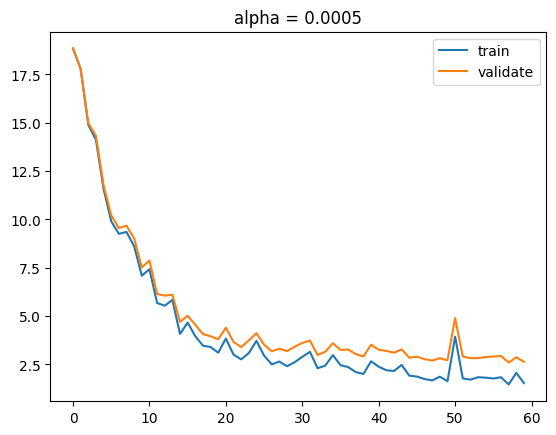

accuracy: 0.9810606060606061
last train error: 1.4269970292085865
last validate error: 2.5080940075094733


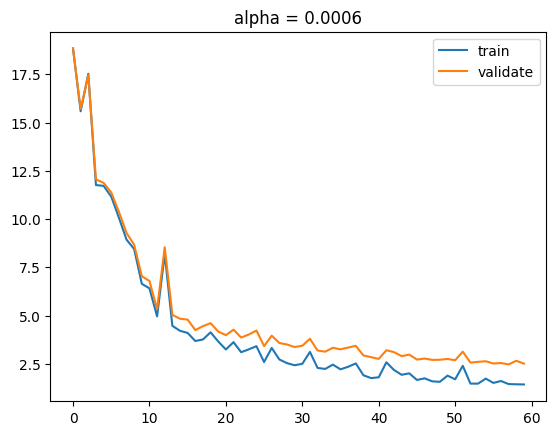

In [25]:
# about 3 min
layers_size = [225, 16, 16, 11]

for learning_rate in [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006]:
    neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
    weights, biases, error_history,error_history_validate = neural_net.train(X_train, y_train, learning_rate, 600, 0.05, X_validate, y_validate)
    print_metrics(neural_net, X_validate, y_validate)
    plot_learning_curve(error_history, error_history_validate, title=f"alpha = {learning_rate}")

Something between 0.0003 - 0.0005 seems to be a useful value. We will use alpha = 0.0004 from now on.

# Activation Function

We have these options:
- Sigmoid
- ReLu
- Tanh

Let's try them out and see what works best.

c:\Users\Sophia\AppData\Local\Programs\Python\Python310\lib\site-packages\machine_learning_framework\metrics.py:63: RuntimeWarning: invalid value encountered in long_scalars
  self.precision = np.sum(self.true_positives) / (np.sum(self.true_positives) + np.sum(self.false_positives))
c:\Users\Sophia\AppData\Local\Programs\Python\Python310\lib\site-packages\machine_learning_framework\metrics.py:69: RuntimeWarning: invalid value encountered in long_scalars
  self.recall = np.sum(self.true_positives) / (np.sum(self.true_positives) + np.sum(self.false_negatives))


accuracy: 0.9709972862957937
last train error: 5.41411747256541
last validate error: 5.841056155925139


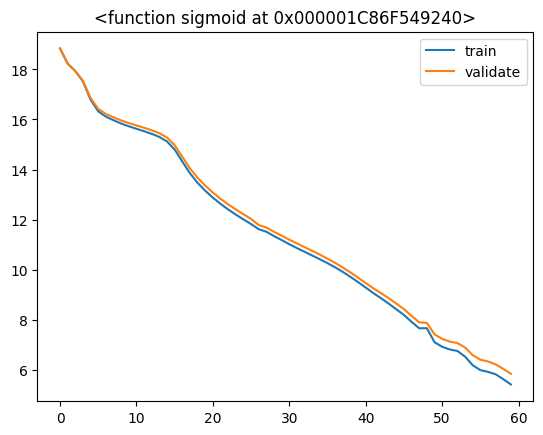

accuracy: 0.9185323383084577
last train error: 15.167862904713516
last validate error: 15.25589408977043


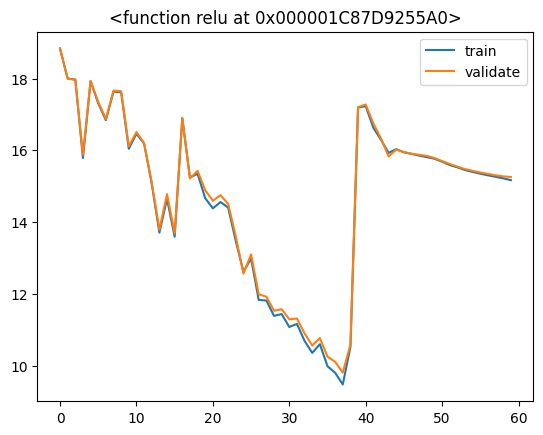

accuracy: 0.9823609226594301
last train error: 1.7713031149037786
last validate error: 2.73859342886828


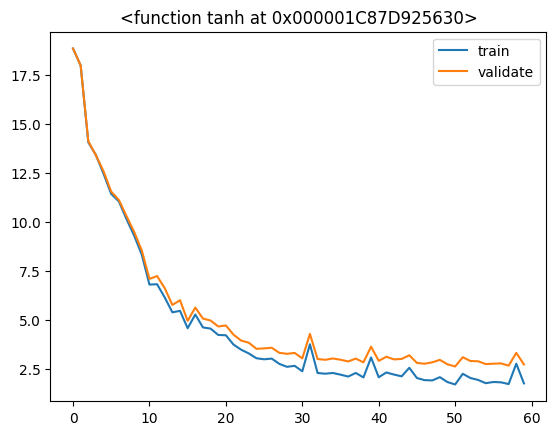

In [8]:
# about 1:30 min 
activation_functions = [sigmoid, relu, tanh]
for activation in activation_functions:
    neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, activation, gradient_descent)
    weights, biases, error_history,error_history_validate = neural_net.train(X_train, y_train, 0.0004, 600, 0.05, X_validate, y_validate)
    print_metrics(neural_net, X_validate, y_validate)
    plot_learning_curve(error_history, error_history_validate, title=f"{activation}")

Since we used tanh before, it is (at the moment) the best model for our data. We will now tweak the alpha parameter to see if the other two activation functions can reach a compareable level.

accuracy: 0.9811736770691994
last train error: 2.6564719825325893
last validate error: 3.289588403722382


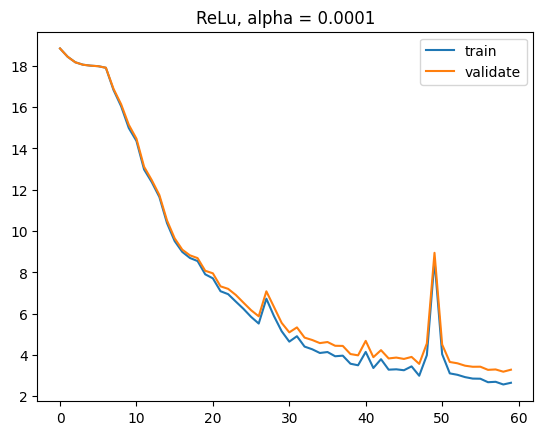

In [23]:
# about 0:30 min 
for alpha in [0.0001]: # values tried: [0.004, 0.002, 0.001, 0.0008, 0.0005, 0.0001] [0.0002, 0.0001, 0.00008, 0.00005]
    neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, relu, gradient_descent)
    weights, biases, error_history,error_history_validate = neural_net.train(X_train, y_train, alpha, 600, 0.05, X_validate, y_validate)
    print_metrics(neural_net, X_validate, y_validate)
    plot_learning_curve(error_history, error_history_validate, title=f"ReLu, alpha = {alpha}")

accuracy: 0.9804952510176391
last train error: 2.522157050008788
last validate error: 3.250364129220644


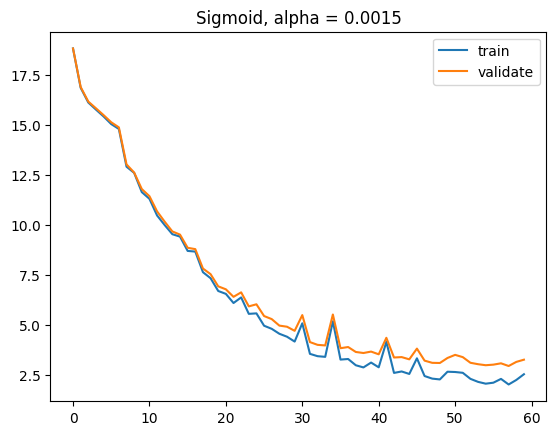

In [19]:
# about 0:30 min 
activation_functions = [sigmoid]
for alpha in [0.0015]: # values tried: [0.004, 0.002, 0.001, 0.0008, 0.0005, 0.0001]
    neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, sigmoid, gradient_descent)
    weights, biases, error_history,error_history_validate = neural_net.train(X_train, y_train, alpha, 600, 0.05, X_validate, y_validate)
    print_metrics(neural_net, X_validate, y_validate)
    plot_learning_curve(error_history, error_history_validate, title=f"Sigmoid, alpha = {alpha}")

These are our best guesses so far:

| activation | validation error | validation accuracy |
|------------|------------------|---------------------|
| tanh       | 2.738            | 0.9823              |
| relu       | 3.289            | 0.9811              |
| sigmoid    | 3.250            | 0.9804              |

Looking at the error and accuracy values tanh seems to be the best choice, even if there is not really a big difference.

# Lambda

higher lambda: model is more prone to underfit

smaller lambda: model ist more prone to overfit

accuracy: 0.9819651741293532
last train error: 1.9292614864368027
last validate error: 2.7060785237768585


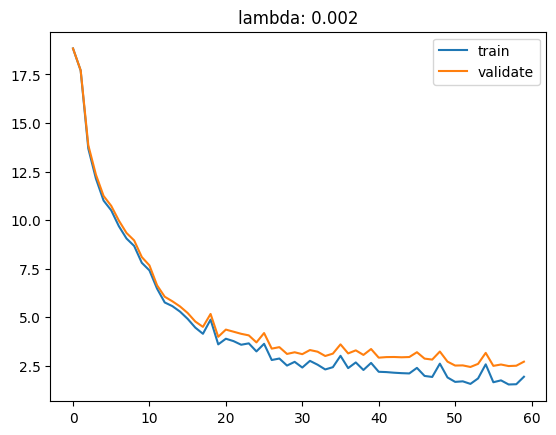

accuracy: 0.9841135232926278
last train error: 2.4851439444962966
last validate error: 3.1126522665733027


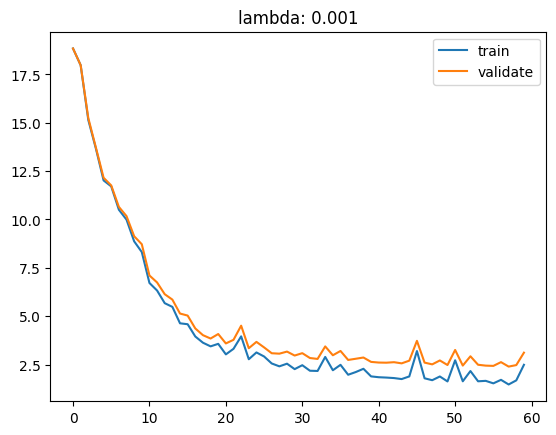

accuracy: 0.9832654907281773
last train error: 1.3922619249569321
last validate error: 2.4276729069805687


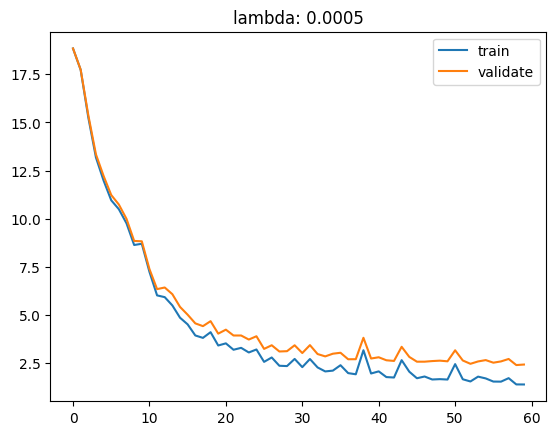

In [29]:
# about 0:30 min 
for lamb in [0.002, 0.001, 0.0005]: #values tried: [0.001, 0.0005, 0.01, 0.05, 0.1, 0.15, 0.2]
    neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
    weights, biases, error_history,error_history_validate = neural_net.train(X_train, y_train, 0.0004, 600, lamb, X_validate, y_validate)
    print_metrics(neural_net, X_validate, y_validate)
    plot_learning_curve(error_history, error_history_validate, title=f"lambda: {lamb}")

These values seem to be pretty close to each one. For now we will orient on the validate error and take Lambda = 0.0005 as value.

# Feature Scaling Method

For the feature scaling method we only have two options: Normalization or Standardization.

Until now we have worked with the ```Standard Scaler```. So if we want to use the ``noramlisation method`` we might have to tweak some other parameters to reach good results. Let's try that. 

In [11]:
X_train_normalized = pd.read_csv("preprocessed_data/data_train.csv")
X_validate_normalized = pd.read_csv("preprocessed_data/data_validate.csv")
X_test_normalized = pd.read_csv("preprocessed_data/data_test.csv")
y_train_normalized = pd.read_csv("preprocessed_data/y_train.csv")
y_validate_normalized = pd.read_csv("preprocessed_data/y_validate.csv")
y_test_normalized = pd.read_csv("preprocessed_data/y_test.csv")

y_train_normalized = pd.get_dummies(y_train_normalized).to_numpy()
y_validate_normalized = pd.get_dummies(y_validate_normalized).to_numpy()
y_test_normalized = pd.get_dummies(y_test_normalized).to_numpy()

X_train_normalized = X_train_normalized.to_numpy()
X_validate_normalized = X_validate_normalized.to_numpy()
X_test_normalized = X_test_normalized.to_numpy()

scaler = NormalScaler()
scaler.fit(X_train_normalized) # fitting the scaler has to be done only with the training data, because our model should act like it has never seen the validation & test data before it comes up with a trained model
X_train_normalized = scaler.transform(X_train_normalized)
X_validate_normalized = scaler.transform(X_validate_normalized)
X_test_normalized = scaler.transform(X_test_normalized)

c:\Users\Sophia\AppData\Local\Programs\Python\Python310\lib\site-packages\machine_learning_framework\metrics.py:63: RuntimeWarning: invalid value encountered in long_scalars
  self.precision = np.sum(self.true_positives) / (np.sum(self.true_positives) + np.sum(self.false_positives))
c:\Users\Sophia\AppData\Local\Programs\Python\Python310\lib\site-packages\machine_learning_framework\metrics.py:69: RuntimeWarning: invalid value encountered in long_scalars
  self.recall = np.sum(self.true_positives) / (np.sum(self.true_positives) + np.sum(self.false_negatives))


accuracy: 0.9090909090909091
last train error: 17.97002780808983
last validate error: 17.96840450815535


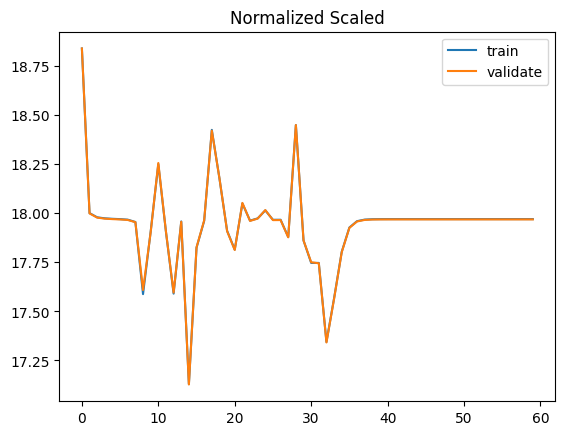

accuracy: 0.9733717774762551
last train error: 1.619392069510792
last validate error: 2.7486333615176006


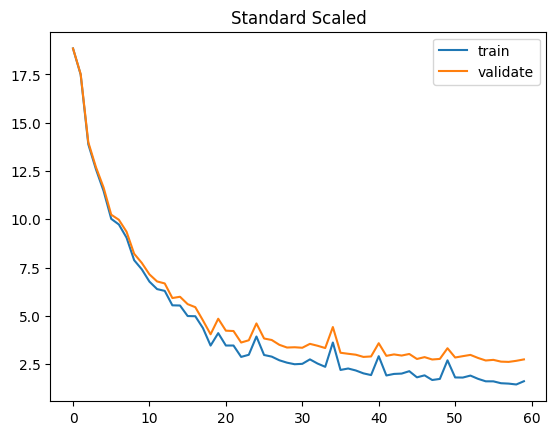

In [36]:
# about 1 min
neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train_normalized, y_train_normalized, 0.0004, 600, 0.0005, X_validate_normalized, y_validate_normalized)
print_metrics(neural_net, X_validate_normalized, y_validate_normalized)
plot_learning_curve(error_history, error_history_validate, title=f"Normalized Scaled")

neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train, y_train, 0.0004, 600, 0.0005, X_validate, y_validate)
print_metrics(neural_net, X_validate, y_validate)
plot_learning_curve(error_history, error_history_validate, title=f"Standard Scaled")

That's looking like the normal scaler is overshooting. Let's fix that by adjusting alpha.

accuracy: 0.9090909090909091
last train error: 17.900325228654335
last validate error: 17.90347119253963


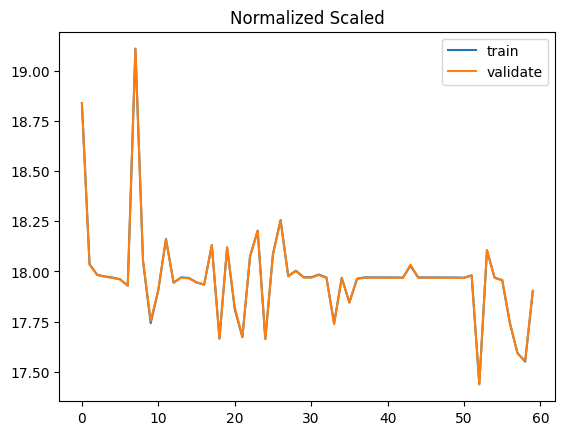

In [45]:
neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train_normalized, y_train_normalized, 0.0003, 600, 0.0005, X_validate_normalized, y_validate_normalized)
print_metrics(neural_net, X_validate_normalized, y_validate_normalized)
plot_learning_curve(error_history, error_history_validate, title=f"Normalized Scaled")

as we can see, a value of 0.0003 ist still causing overshooting.

accuracy: 0.9386589778380823
last train error: 11.325849734149742
last validate error: 11.426497816661659


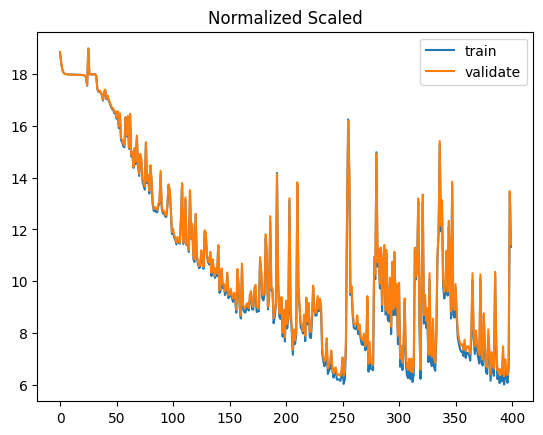

In [46]:
# about 2 min
neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train_normalized, y_train_normalized, 0.0001, 4000, 0.0005, X_validate_normalized, y_validate_normalized)
print_metrics(neural_net, X_validate_normalized, y_validate_normalized)
plot_learning_curve(error_history, error_history_validate, title=f"Normalized Scaled")

That still looks like overshooting. And it is needing about 2500 iterations to come to an error of about 6 (as comparison: the error of the standard scaling method < 3). So we will keep the standard scaler.

We also tried to adjust lambda (see code cell below), which led to better results, but these are also not even close to our previous best model.

accuracy: 0.9269561284486658
last train error: 12.111578598433399
last validate error: 12.20992892330212


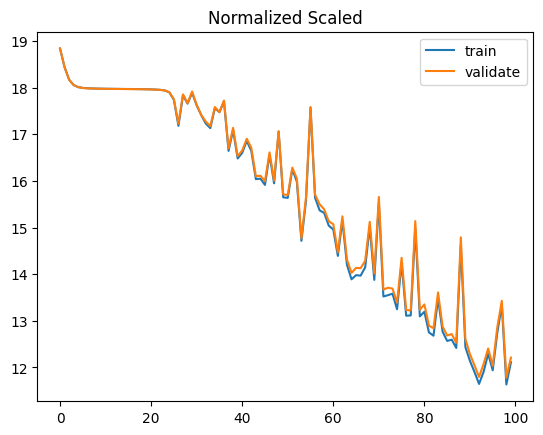

In [20]:
# about 1 min
neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train_normalized, y_train_normalized, 0.0001, 1000, 1, X_validate_normalized, y_validate_normalized)
print_metrics(neural_net, X_validate_normalized, y_validate_normalized)
plot_learning_curve(error_history, error_history_validate, title=f"Normalized Scaled")

# Number of Layers & Neurons

Since Number of Layer and Number of Neurons are probably dependant on each other they will be optimized togehter. A random search could be the best option here, because there is a endless number of combinations.

A note to the metrics: Due to the fact that there is some randomness in the training process involved, small changes can be attributed to both that we have found a better model or randomness. Here are a few different training sessions of the same model:

In [9]:
# about 4 min
for i in range(10):
    neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
    weights, biases, error_history,error_history_validate = neural_net.train(X_train, y_train, 0.0004, 600, 0.0005, X_validate, y_validate)
    print(f"--- round {i} of training the same model ---")
    #print_metrics(neural_net, X_validate, y_validate)
    #plot_learning_curve(error_history, error_history_validate, title=f"Standard Scaled")
    print(f"last train error: {error_history[-1]}")
    print(f"last validate error: {error_history_validate[-1]}")

--- round 0 of training the same model ---
last train error: 1.6522246403900893
last validate error: 2.609507788270423
--- round 1 of training the same model ---
last train error: 1.5650592218221597
last validate error: 2.645078046421065
--- round 2 of training the same model ---
last train error: 1.8714461113264242
last validate error: 2.9059048607882834
--- round 3 of training the same model ---
last train error: 1.3212493327427943
last validate error: 2.368281935149014
--- round 4 of training the same model ---
last train error: 1.405143216548409
last validate error: 2.3881768960343557
--- round 5 of training the same model ---
last train error: 1.5298716251233304
last validate error: 2.5450509927123113
--- round 6 of training the same model ---
last train error: 1.7898514308078453
last validate error: 2.749157613976542
--- round 7 of training the same model ---
last train error: 1.7210415917865451
last validate error: 2.6577700107620568
--- round 8 of training the same model ---
la

In [ ]:
neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train, y_train, 0.0004, 600, 0.0005, X_validate, y_validate)
print(f"--- round {i} of training the same model ---")
print_metrics(neural_net, X_validate, y_validate)
#plot_learning_curve(error_history, error_history_validate, title=f"Standard Scaled")
print(f"last train error: {error_history[-1]}")
print(f"last validate error: {error_history_validate[-1]}")

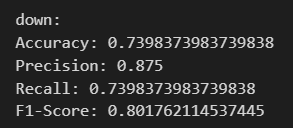

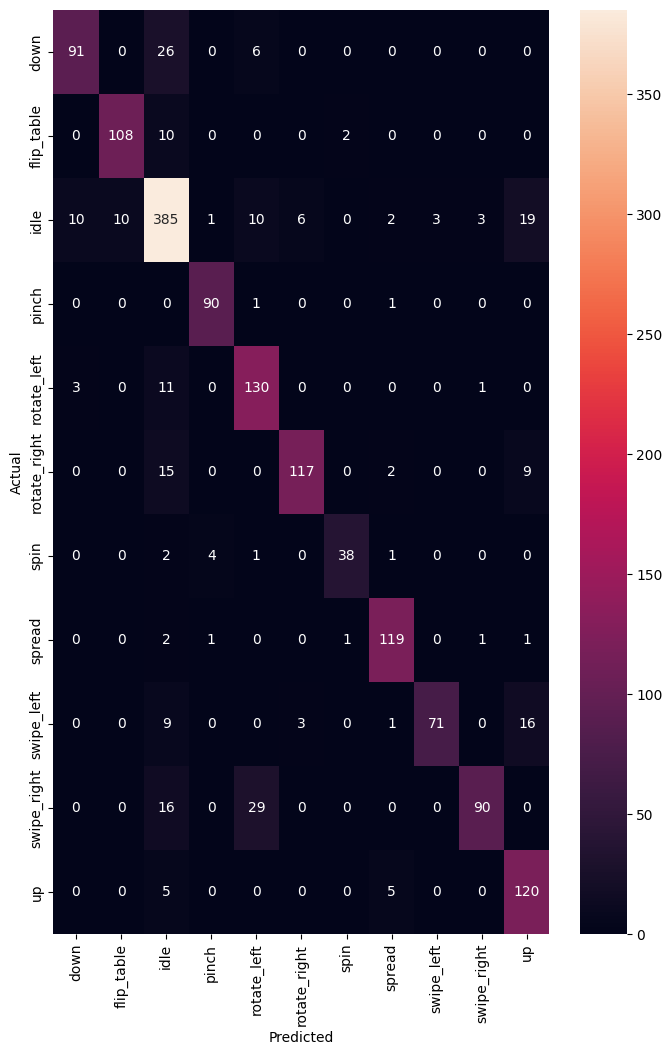

To have a (at least somewhat) replicable random search we will first get some random values, copy them to a markdown cell and then use those values.

In [92]:
# generating random numbers
many_differen_layers = []
for different_option in range(30):
    layers_with_neurons = [225]
    layers_number = random.randint(1, 2)
    #neuron_number = random.randint(11, 200)
    for layer in range(layers_number):
        layers_with_neurons.append(random.randint(11, 200))
        #layers_with_neurons.append(neuron_number)
    layers_with_neurons.append(11)
    many_differen_layers.append(layers_with_neurons)

many_differen_layers    

[[225, 180, 14, 11],
 [225, 151, 58, 11],
 [225, 33, 46, 11],
 [225, 126, 11],
 [225, 124, 11],
 [225, 76, 38, 11],
 [225, 49, 11],
 [225, 156, 118, 11],
 [225, 120, 11],
 [225, 24, 184, 11],
 [225, 51, 72, 11],
 [225, 193, 29, 11],
 [225, 31, 11],
 [225, 49, 32, 11],
 [225, 114, 43, 11],
 [225, 109, 55, 11],
 [225, 161, 11],
 [225, 127, 171, 11],
 [225, 43, 11],
 [225, 101, 11],
 [225, 58, 148, 11],
 [225, 15, 60, 11],
 [225, 157, 150, 11],
 [225, 41, 11],
 [225, 55, 11],
 [225, 108, 11],
 [225, 66, 126, 11],
 [225, 147, 11],
 [225, 139, 175, 11],
 [225, 129, 11]]

Let's try the following layers

[[225, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 11],  
 [225, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 11],  
 [225,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  11],  
 [225, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11],  
 [225, 8, 8, 8, 8, 8, 8, 8, 8, 8, 11],  
 [225, 11, 11, 11, 11],  
 [225, 20, 20, 20, 20, 20, 11],  
 [225, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 11],  
 [225, 3, 3, 3, 3, 3, 3, 3, 3, 11],  
 [225, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 11]]  

 => The one with 11 neurons x 3 hidden layers outperforms the others. Maybe that's because there are less layers or because the number of neurons is good. Let's try less layers.

 [[225, 7, 7, 7, 7, 7, 7, 7, 7, 7, 11],  
 [225, 1, 1, 1, 1, 11],  
 [225, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 11],  
 [225, 16, 16, 16, 16, 11],  
 [225, 9, 9, 9, 11],  
 [225, 20, 20, 20, 20, 20, 20, 20, 20, 20, 11],  
 [225, 12, 11],  
 [225, 3, 3, 3, 3, 3, 3, 3, 11],  
 [225, 3, 3, 3, 3, 11],  
 [225, 16, 16, 16, 16, 11]]  
  
 [[225, 7, 7, 7, 11],  
 [225, 18, 18, 18, 18, 11],  
 [225, 7, 11],  
 [225, 5, 5, 5, 11],  
 [225, 3, 3, 3, 3, 11],  
 [225, 3, 3, 3, 3, 11],  
 [225, 15, 15, 11],  
 [225, 16, 16, 11],  
 [225, 19, 19, 19, 11],  
 [225, 8, 8, 11]]  

 => 4 Layers seem to be too much. Everything below seems to work relativley well. Now we will focus on the number of neurons. Since high numvers (e.g. 19 with 3 layers) seemed to get good results we will increase the number of possible neurons.

 [[225, 10, 10, 11],  
 [225, 35, 11],  
 [225, 5, 5, 5, 11],  
 [225, 30, 30, 11],  
 [225, 8, 11],  
 [225, 47, 47, 11],  
 [225, 21, 21, 11],  
 [225, 12, 11],  
 [225, 21, 21, 21, 11],  
 [225, 27, 27, 27, 11]]  
  
 [[225, 61, 11],  
 [225, 65, 11],  
 [225, 11],  
 [225, 18, 11],  
 [225, 89, 89, 89, 11],  
 [225, 81, 81, 81, 11],  
 [225, 86, 86, 86, 11],  
 [225, 52, 11],  
 [225, 98, 11]]  

  => That seems like we could reduce the layers to max 2.

[[225, 187, 11],  
 [225, 67, 67, 11],  
 [225, 150, 150, 11],  
 [225, 104, 11],  
 [225, 116, 11],  
 [225, 90, 11],  
 [225, 123, 123, 11],  
 [225, 83, 11],  
 [225, 55, 11],  
 [225, 33, 11]]  

    => following numbers have the same or better accuracy than our current best model:
  35 neurons (1 Layer), 47 (2 layers), 21 (2 layers), 61 (1 Layer), 65 (1L), 18 (1L), 52 (1L), 98(1L), 187(1L), 104(1L), 110(1L), 90(1L), 83(1L), 55(1L), 33(1L)

[[225, 180, 14, 11],  
 [225, 151, 58, 11],  
 [225, 33, 46, 11],  
 [225, 126, 11],  
 [225, 124, 11],  
 [225, 76, 38, 11],  
 [225, 49, 11],  
 [225, 156, 118, 11],  
 [225, 120, 11],  
 [225, 24, 184, 11],  
 [225, 51, 72, 11],  
 [225, 193, 29, 11],  
 [225, 31, 11],  
 [225, 49, 32, 11],  
 [225, 114, 43, 11],  
 [225, 109, 55, 11],  
 [225, 161, 11],  
 [225, 127, 171, 11],  
 [225, 43, 11],  
 [225, 101, 11],  
 [225, 58, 148, 11],  
 [225, 15, 60, 11],  
 [225, 157, 150, 11],  
 [225, 41, 11],  
 [225, 55, 11],  
 [225, 108, 11],  
 [225, 66, 126, 11],  
 [225, 147, 11],  
 [225, 139, 175, 11],  
 [225, 129, 11]]  

In [ ]:
# about 6 min for 10 options
different_options = [[225, 180, 14, 11],
 [225, 151, 58, 11],
 [225, 33, 46, 11],
 [225, 126, 11],
 [225, 124, 11],
 [225, 76, 38, 11],
 [225, 49, 11],
 [225, 156, 118, 11],
 [225, 120, 11],
 [225, 24, 184, 11],
 [225, 51, 72, 11],
 [225, 193, 29, 11],
 [225, 31, 11],
 [225, 49, 32, 11],
 [225, 114, 43, 11],
 [225, 109, 55, 11],
 [225, 161, 11],
 [225, 127, 171, 11],
 [225, 43, 11],
 [225, 101, 11],
 [225, 58, 148, 11],
 [225, 15, 60, 11],
 [225, 157, 150, 11],
 [225, 41, 11],
 [225, 55, 11],
 [225, 108, 11],
 [225, 66, 126, 11],
 [225, 147, 11],
 [225, 139, 175, 11],
 [225, 129, 11]]

error_last_nn = 0
for layers in different_options:
    print(f"--- layers: {layers} ---")
    neural_net = NeuralNet(layers, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
    weights, biases, error_history,error_history_validate = neural_net.train(X_train, y_train, 0.0004, 600, 0.0005, X_validate, y_validate)
    print_metrics(neural_net, X_validate, y_validate)
    #plot_learning_curve(error_history, error_history_validate, title=f"Standard Scaled")
    #print(f"last train error: {error_history[-1]}")
    #print(f"last validate error: {error_history_validate[-1]}")
    # if (error_history_validate[-1] < error_last_nn):
    #     print("this is better than provious model")
    error_last_nn = error_history_validate[-1]

since our previous model performs most poorley with the down gesture. We used that value to optimize. This is the best we got with different layers and neurons:

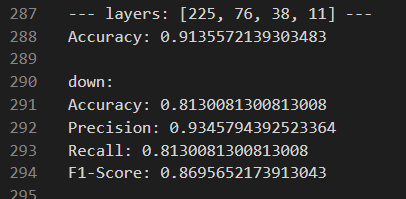

Accuracy: 0.900497512437811

down: 
Accuracy: 0.8373983739837398
Precision: 0.8278688524590164
Recall: 0.8211382113821138
F1-Score: 0.8244897959183674

flip_table: 
Accuracy: 0.9166666666666666
Precision: 0.9159663865546218
Recall: 0.9083333333333333
F1-Score: 0.9121338912133891

idle: 
Accuracy: 0.8329621380846325
Precision: 0.8896882494004796
Recall: 0.8262806236080178
F1-Score: 0.8568129330254042

pinch: 
Accuracy: 0.9891304347826086
Precision: 0.9473684210526315
Recall: 0.9782608695652174
F1-Score: 0.9625668449197862

rotate_left: 
Accuracy: 0.9103448275862069
Precision: 0.9424460431654677
Recall: 0.903448275862069
F1-Score: 0.9225352112676055

rotate_right: 
Accuracy: 0.9300699300699301
Precision: 0.8741721854304636
Recall: 0.9230769230769231
F1-Score: 0.8979591836734694

spin: 
Accuracy: 0.9130434782608695
Precision: 0.9130434782608695
Recall: 0.9130434782608695
F1-Score: 0.9130434782608695

spread: 
Accuracy: 0.976
Precision: 0.983739837398374
Recall: 0.968
F1-Score: 0.975806451

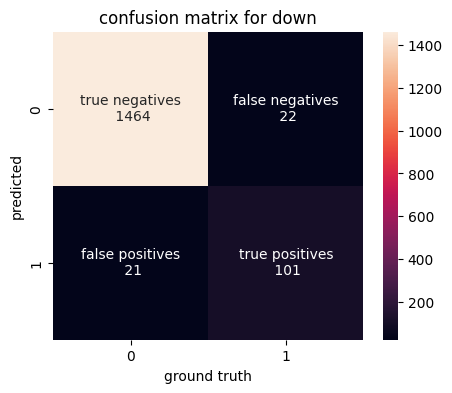

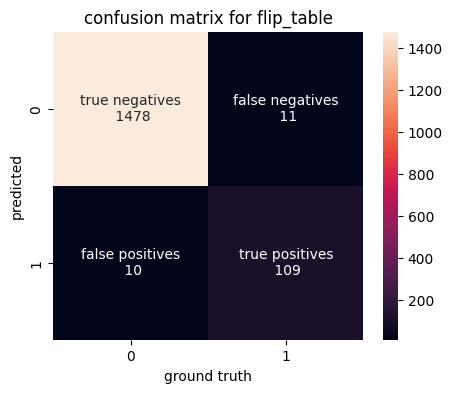

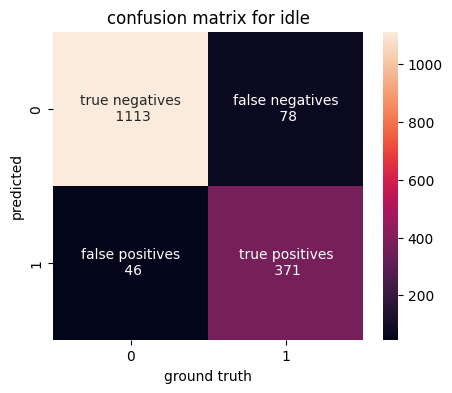

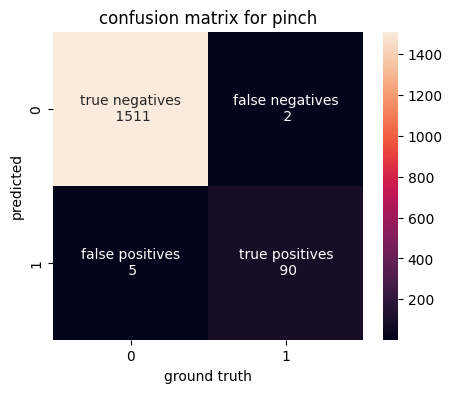

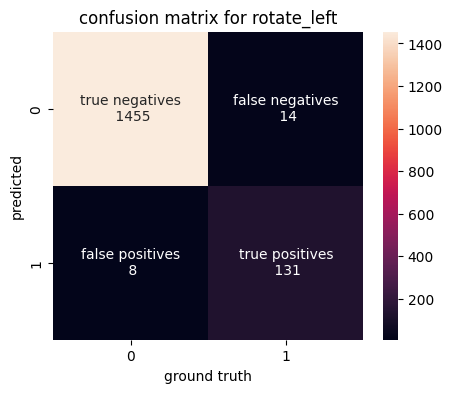

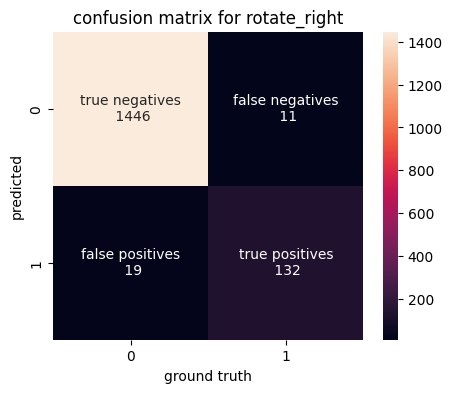

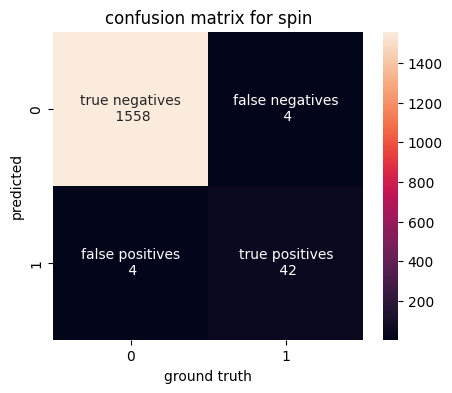

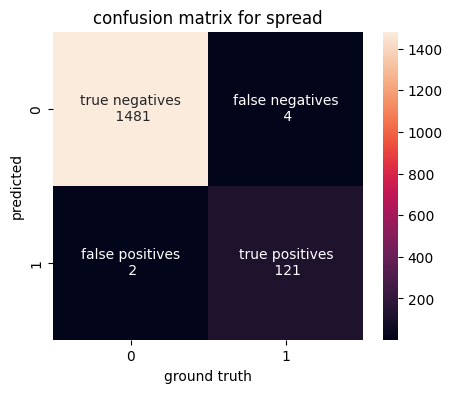

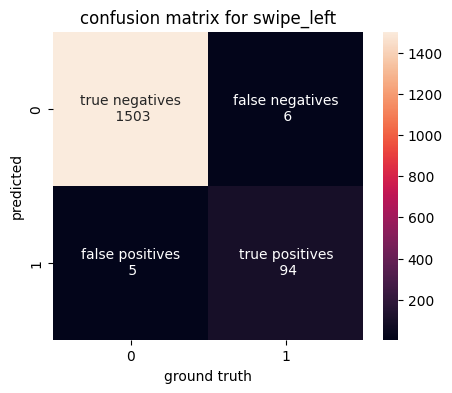

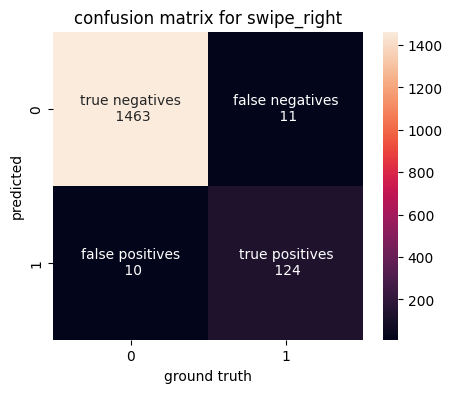

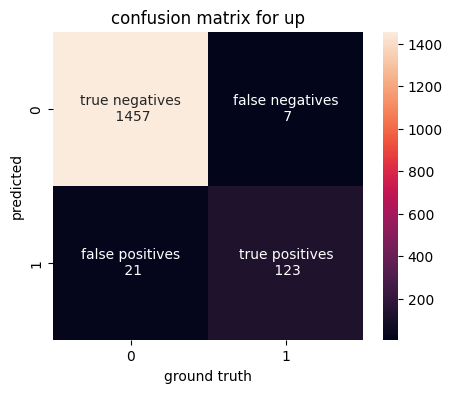

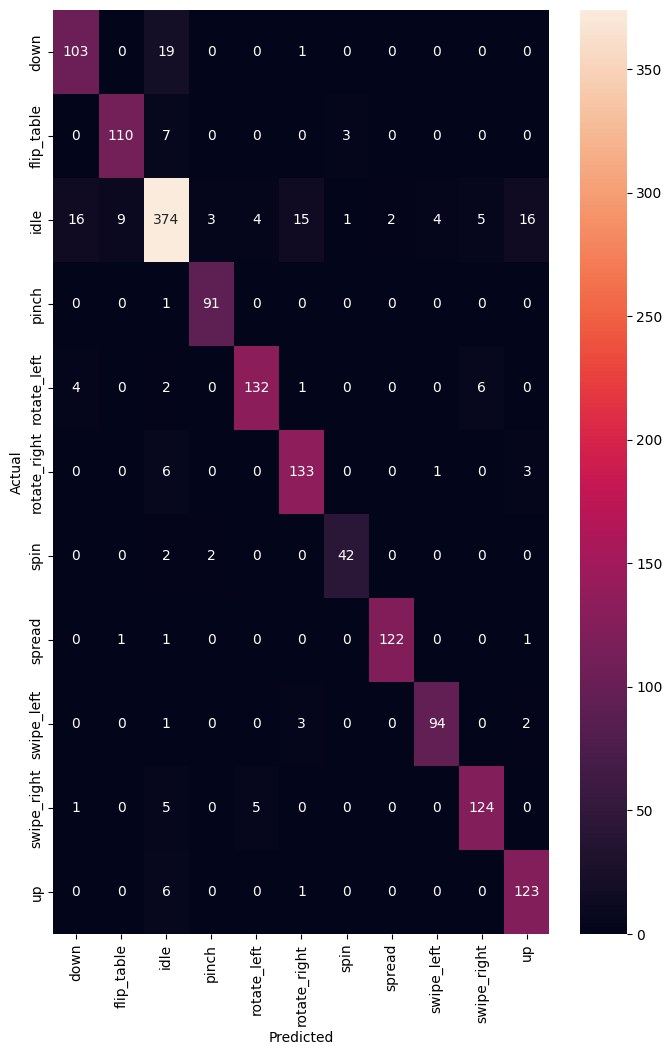

In [18]:
layers_size = [225, 76, 38, 11]

neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train, y_train, 0.0004, 600, 0.0005, X_validate, y_validate)
print_metrics(neural_net, X_validate, y_validate)

print(f"last train error: {error_history[-1]}")
print(f"last validate error: {error_history_validate[-1]}")

last train error: 0.47633336418899036
last validate error: 2.0385388809524105


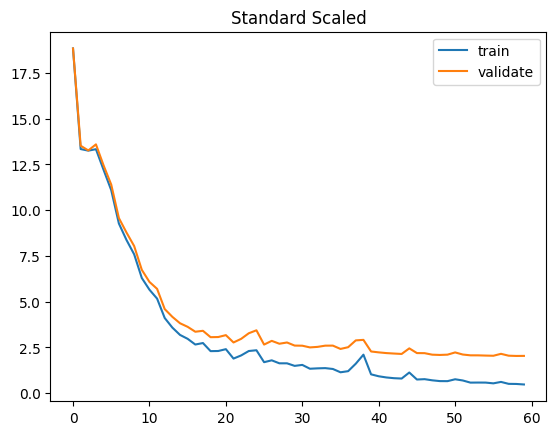

In [13]:
plot_learning_curve(error_history, error_history_validate, title=f"Standard Scaled")

# Input Features

- chunck size?
- All Features?
- 15 Features?
- 7 Features?
- Are Features that combine two features (x^2, x*y, x-y) useful?

## Chunck size
How many frames do we need to be able to make good predictions?

### Generate data with different chunk sizes

In [7]:
# 13 min
features = ["timestamp",
                "right_mouth_z",
                "left_shoulder_z", 
                "right_shoulder_z", 
                "left_elbow_x", "left_elbow_y", "left_elbow_z", 
                "right_elbow_x", "right_elbow_y", "right_elbow_z", 
                "left_thumb_x", "left_thumb_y", "left_thumb_z",
                "right_thumb_x", "right_thumb_y", "right_thumb_z",
                "ground_truth"]
preprocess.preprocess_and_save_data(features, chunk_size=10, subfolder_name="10_frames")

c:\Users\Sophia\Desktop\Programming\Machine Learning\main-project\utils\preprocess.py:118: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array(X_train)
c:\Users\Sophia\Desktop\Programming\Machine Learning\main-project\utils\preprocess.py:119: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_validate = np.array(X_validate)
c:\Users\Sophia\Desktop\Programming\Machine Learning\main-project\utils\preprocess.py:120: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

In [8]:
# 12 min
features = ["timestamp",
                "right_mouth_z",
                "left_shoulder_z", 
                "right_shoulder_z", 
                "left_elbow_x", "left_elbow_y", "left_elbow_z", 
                "right_elbow_x", "right_elbow_y", "right_elbow_z", 
                "left_thumb_x", "left_thumb_y", "left_thumb_z",
                "right_thumb_x", "right_thumb_y", "right_thumb_z",
                "ground_truth"]
preprocess.preprocess_and_save_data(features, chunk_size=20, subfolder_name="20_frames")

c:\Users\Sophia\Desktop\Programming\Machine Learning\main-project\utils\preprocess.py:118: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array(X_train)
c:\Users\Sophia\Desktop\Programming\Machine Learning\main-project\utils\preprocess.py:119: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_validate = np.array(X_validate)
c:\Users\Sophia\Desktop\Programming\Machine Learning\main-project\utils\preprocess.py:120: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

In [9]:
# 14 min
features = ["timestamp",
                "right_mouth_z",
                "left_shoulder_z", 
                "right_shoulder_z", 
                "left_elbow_x", "left_elbow_y", "left_elbow_z", 
                "right_elbow_x", "right_elbow_y", "right_elbow_z", 
                "left_thumb_x", "left_thumb_y", "left_thumb_z",
                "right_thumb_x", "right_thumb_y", "right_thumb_z",
                "ground_truth"]
preprocess.preprocess_and_save_data(features, chunk_size=30, subfolder_name="30_frames")

c:\Users\Sophia\Desktop\Programming\Machine Learning\main-project\utils\preprocess.py:118: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array(X_train)
c:\Users\Sophia\Desktop\Programming\Machine Learning\main-project\utils\preprocess.py:119: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_validate = np.array(X_validate)
c:\Users\Sophia\Desktop\Programming\Machine Learning\main-project\utils\preprocess.py:120: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarr

### Try different chunk sizes

In [12]:
X_train_10, X_validate_10, X_test_10, y_train_10, y_validate_10, y_test_10 = read_data("10_frames/")
X_train_20, X_validate_20, X_test_20, y_train_20, y_validate_20, y_test_20 = read_data("20_frames/")
X_train_30, X_validate_30, X_test_30, y_train_30, y_validate_30, y_test_30 = read_data("30_frames/")

In [ ]:
layers_size = [150, 76, 38, 11]

neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train_10, y_train_10, 0.0004, 600, 0.0005, X_validate_10, y_validate_10)
print_metrics(neural_net, X_validate_10, y_validate_10)

print(f"last train error: {error_history[-1]}")
print(f"last validate error: {error_history_validate[-1]}")

| 10 frames  | 15 frames (previous) |
|---|---|
|  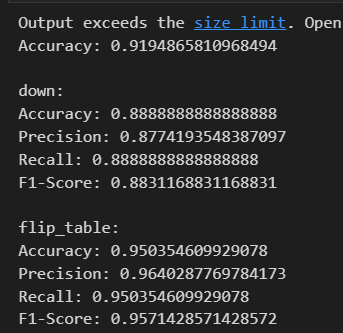 |  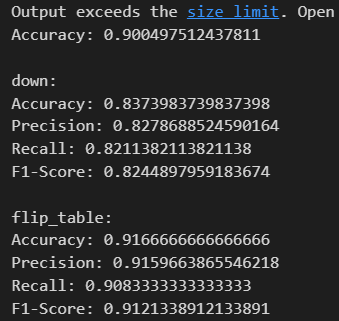 |
|  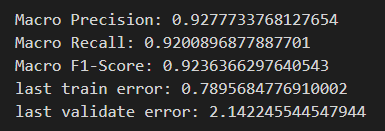  | 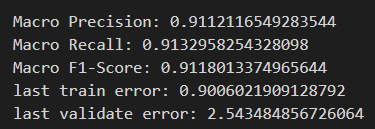|
|  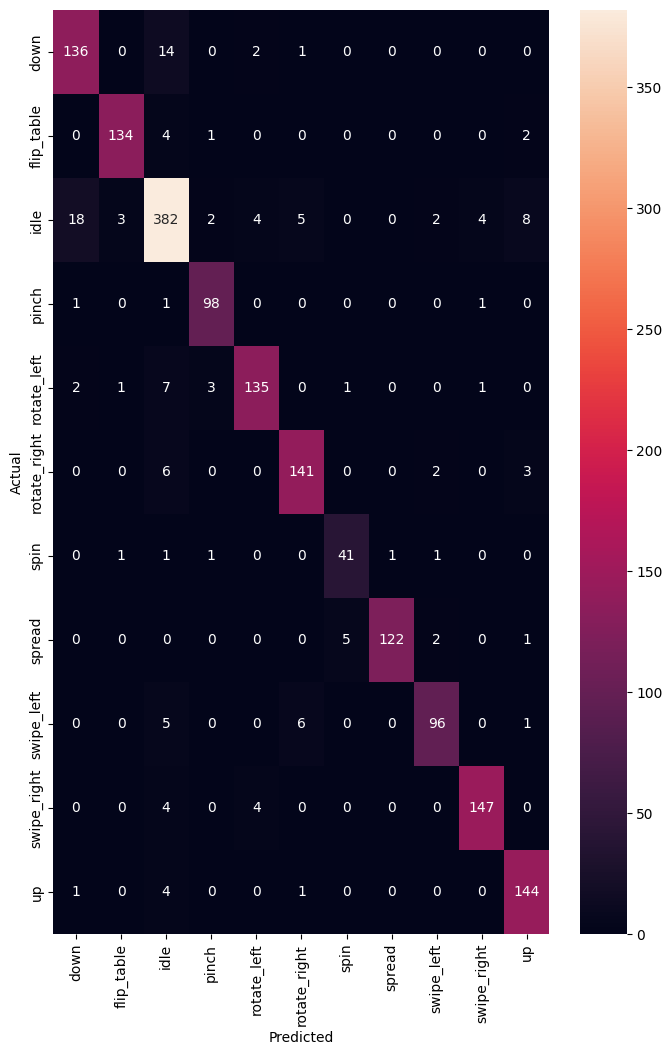 | 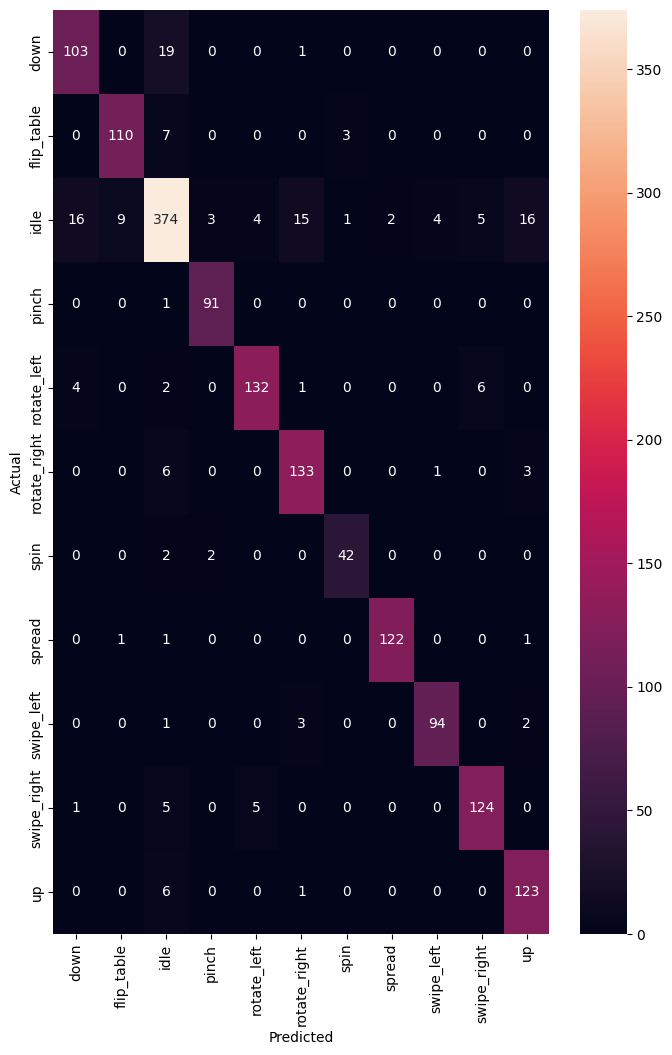  |

last train error: 0.7883868238048952
last validate error: 2.0458512243860416


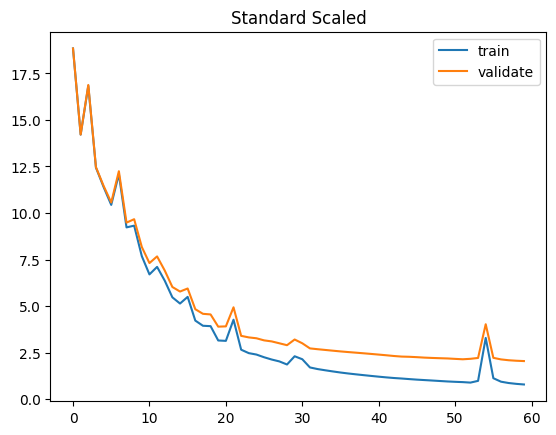

In [16]:
plot_learning_curve(error_history, error_history_validate, title=f"10 frames")

In [ ]:
layers_size = [300, 76, 38, 11]

neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train_20, y_train_20, 0.0004, 600, 0.0005, X_validate_20, y_validate_20)
print_metrics(neural_net, X_validate_20, y_validate_20)

print(f"last train error: {error_history[-1]}")
print(f"last validate error: {error_history_validate[-1]}")

| 20 frames  | 15 frames (previous) |
|---|---|
| 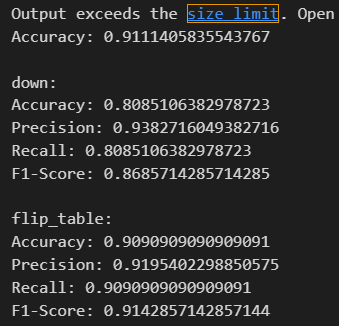 | 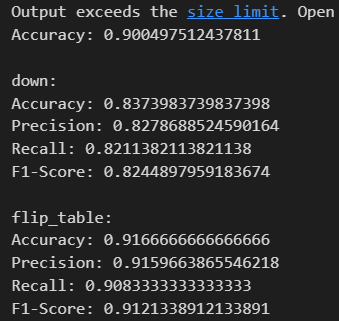  |
|  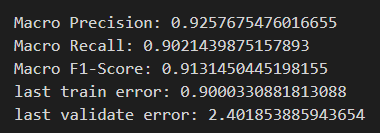  | 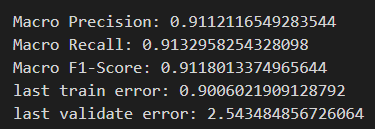|
| 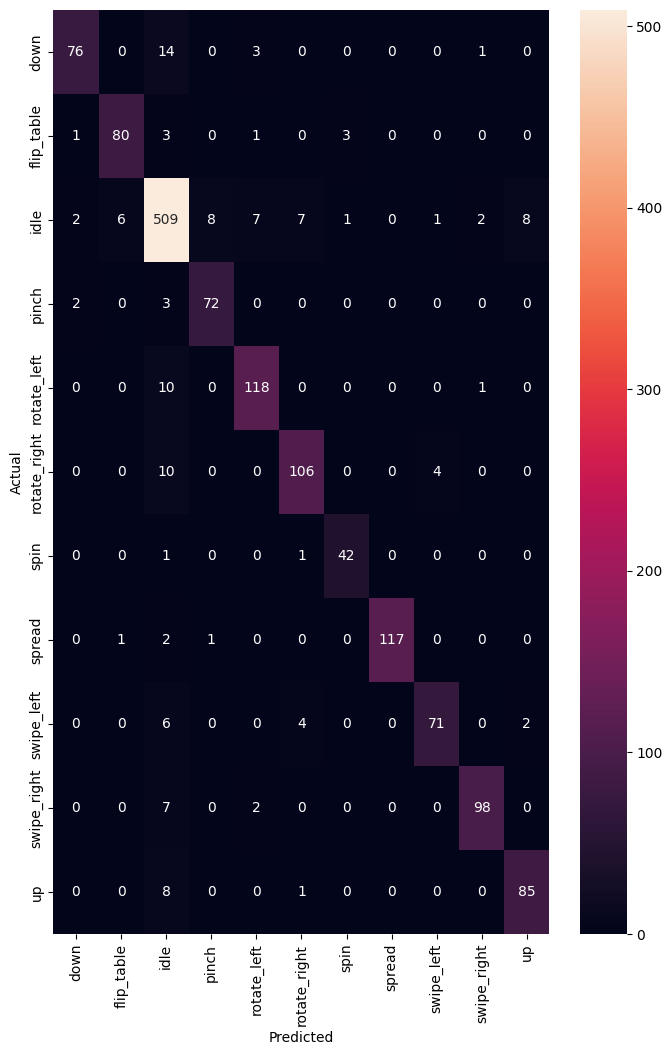  | 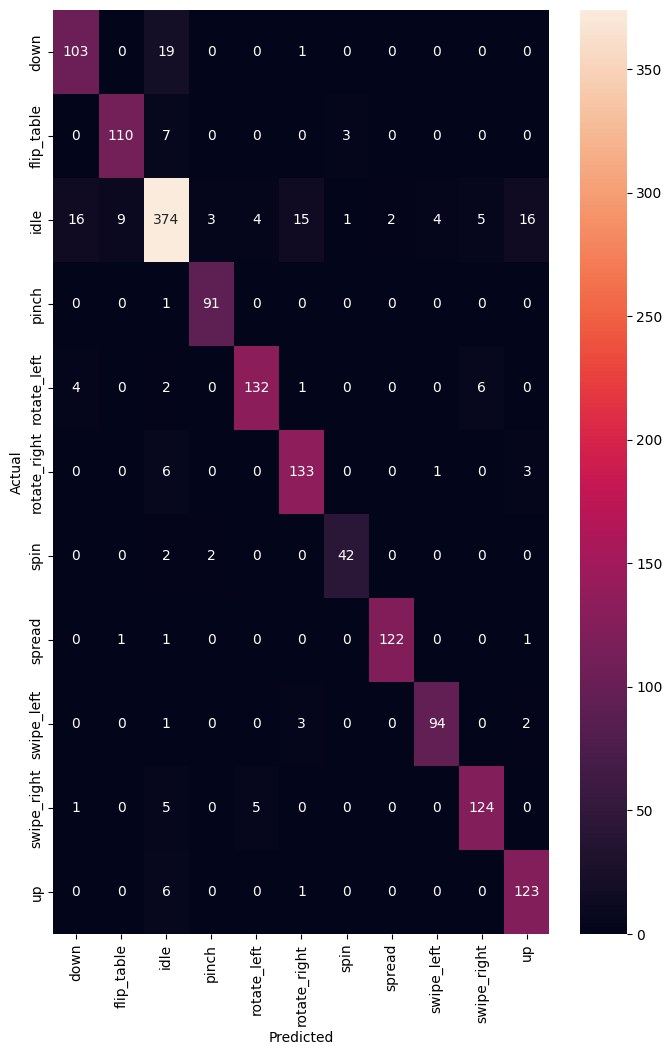 |

last train error: 0.9000330881813088
last validate error: 2.401853885943654


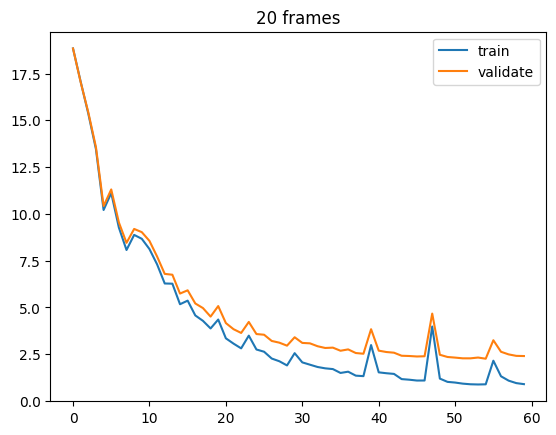

In [21]:
plot_learning_curve(error_history, error_history_validate, title=f"20 frames")

In [ ]:
layers_size = [450, 76, 38, 11]

neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train_30, y_train_30, 0.0004, 600, 0.0005, X_validate_30, y_validate_30)
print_metrics(neural_net, X_validate_30, y_validate_30)

print(f"last train error: {error_history[-1]}")
print(f"last validate error: {error_history_validate[-1]}")

| 30 frames  | 15 frames (previous) |
|---|---|
| 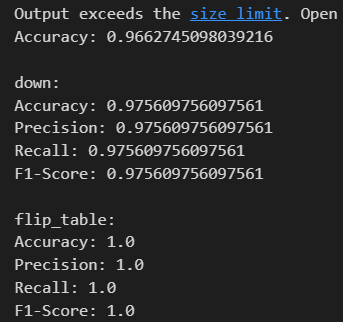 |  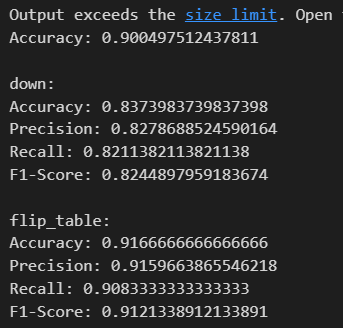 |
| 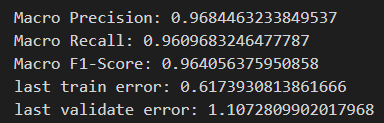  | 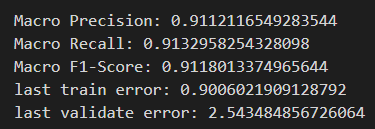|
|  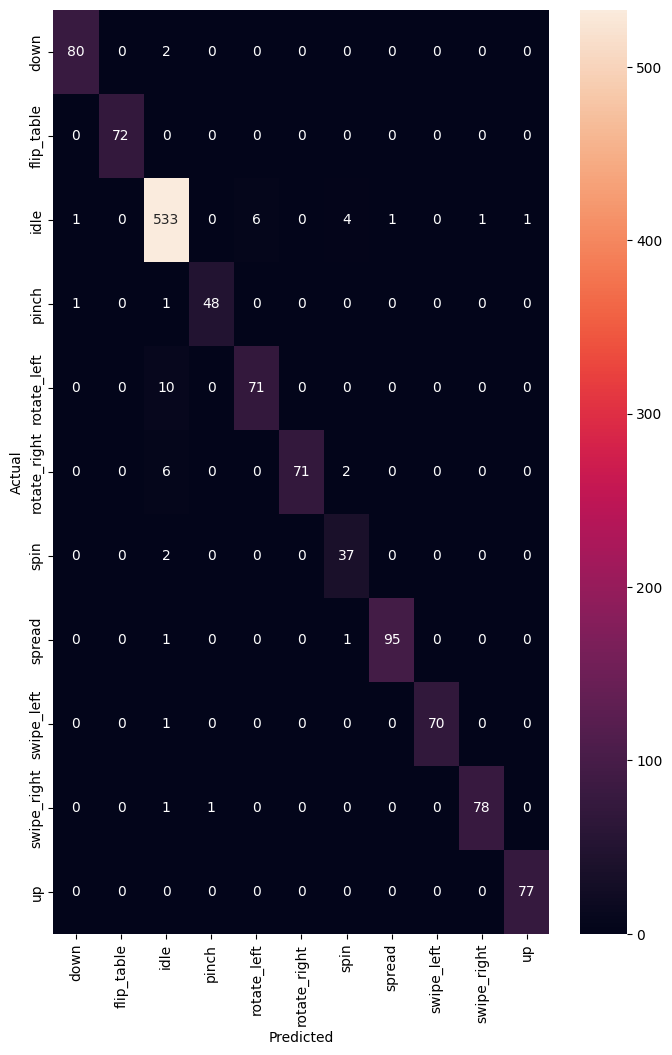 | 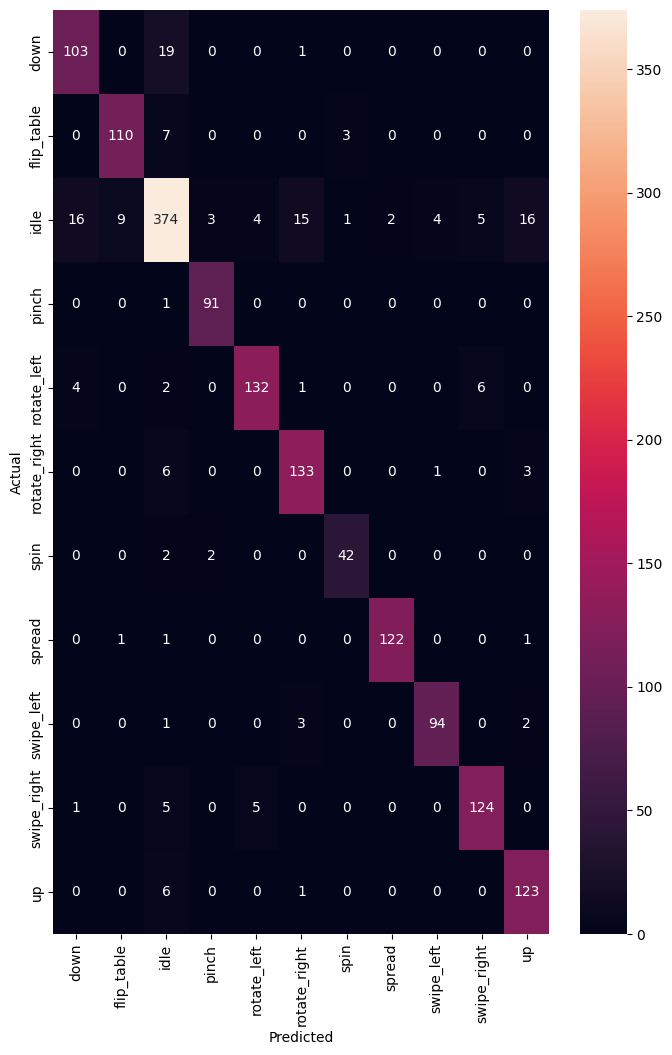 |

last train error: 0.6173930813861666
last validate error: 1.1072809902017968


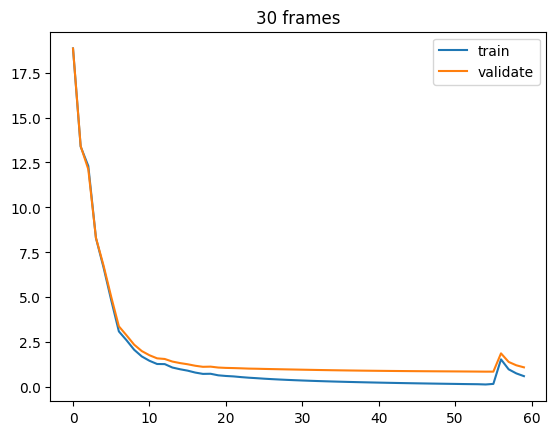

In [23]:
plot_learning_curve(error_history, error_history_validate, title=f"30 frames")

In [25]:
# export the best guess
np.savez('weights', w0=weights[0], w1=weights[1], w2=weights[2])
np.savez('biases', b0=biases[0], b1=biases[1], b2=biases[2])

30 frames are our best guess so far.

## How many features?

What and how many features are helping the model to make the correct predictions? Does the combination of features help?

Things we will try out in this section are 
- 15 features (our current model; for a statement why we chose these have a look in data_exploration)
- all features
- only 7 features (for a statement why we chose this 7 features have a look in data_exploration)
- combined features (plus, minus, multiply)

### Generate Data with different features

In [ ]:
# 12min 30s
features = ["timestamp",
                "right_mouth_z",
                "left_thumb_x", "left_thumb_y", "left_thumb_z",
                "right_thumb_x", "right_thumb_y", "right_thumb_z",
                "ground_truth"]
preprocess.preprocess_and_save_data(features, chunk_size=30, subfolder_name="min_features")

In [ ]:
# 15min
features = ["timestamp",
            "nose_x","nose_y","nose_z",
            "left_eye_inner_x","left_eye_inner_y","left_eye_inner_z",
            "left_eye_x","left_eye_y","left_eye_z",
            "left_eye_outer_x","left_eye_outer_y","left_eye_outer_z",
            "right_eye_inner_x","right_eye_inner_y","right_eye_inner_z",
            "right_eye_x","right_eye_y","right_eye_z",
            "right_eye_outer_x","right_eye_outer_y","right_eye_outer_z",
            "left_ear_x","left_ear_y","left_ear_z",
            "right_ear_x","right_ear_y","right_ear_z",
            "left_mouth_x","left_mouth_y","left_mouth_z",
            "right_mouth_x","right_mouth_y","right_mouth_z",
            "left_shoulder_x","left_shoulder_y","left_shoulder_z",
            "right_shoulder_x","right_shoulder_y","right_shoulder_z",
            "left_elbow_x","left_elbow_y","left_elbow_z",
            "right_elbow_x","right_elbow_y","right_elbow_z",
            "left_wrist_x","left_wrist_y","left_wrist_z",
            "right_wrist_x","right_wrist_y","right_wrist_z",
            "left_pinky_x","left_pinky_y","left_pinky_z",
            "right_pinky_x","right_pinky_y","right_pinky_z",
            "left_index_x","left_index_y","left_index_z",
            "right_index_x","right_index_y","right_index_z",
            "left_thumb_x","left_thumb_y","left_thumb_z",
            "right_thumb_x","right_thumb_y","right_thumb_z",
            "left_hip_x","left_hip_y","left_hip_z",
            "right_hip_x","right_hip_y","right_hip_z",
            "left_knee_x","left_knee_y","left_knee_z",
            "right_knee_x","right_knee_y","right_knee_z",
            "left_ankle_x","left_ankle_y","left_ankle_z",
            "right_ankle_x","right_ankle_y","right_ankle_z",
            "left_heel_x","left_heel_y","left_heel_z",
            "right_heel_x","right_heel_y","right_heel_z",
            "left_foot_index_x","left_foot_index_y","left_foot_index_z",
            "right_foot_index_x","right_foot_index_y","right_foot_index_z",
            "ground_truth"]
preprocess.preprocess_and_save_data(features, chunk_size=30, subfolder_name="max_features")

In [ ]:
# 10min
preprocess.preprocess_and_save_combined(operator.sub, chunk_size=30, subfolder_name="sub_features")

In [ ]:
# 6min
preprocess.preprocess_and_save_combined(operator.add, chunk_size=30, subfolder_name="add_features")

In [ ]:
# 6min 30s
preprocess.preprocess_and_save_combined(operator.mul, chunk_size=30, subfolder_name="mul_features")

### Test Data with different features

In [17]:
X_train_min, X_validate_min, X_test_min, y_train_min, y_validate_min, y_test_min = read_data("min_features/")
X_train_max, X_validate_max, X_test_max, y_train_max, y_validate_max, y_test_max = read_data("max_features/")
X_train_sub, X_validate_sub, X_test_sub, y_train_sub, y_validate_sub, y_test_sub = read_data("sub_features/")
X_train_add, X_validate_add, X_test_add, y_train_add, y_validate_add, y_test_add = read_data("add_features/")
X_train_mul, X_validate_mul, X_test_mul, y_train_mul, y_validate_mul, y_test_mul = read_data("mul_features/")

#### 7 Features

In [ ]:
layers_size = [210, 76, 38, 11]

neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train_min, y_train_min, 0.0004, 600, 0.0005, X_validate_min, y_validate_min)
print_metrics(neural_net, X_validate_min, y_validate_min)

print(f"last train error: {error_history[-1]}")
print(f"last validate error: {error_history_validate[-1]}")

| 7 Features  | 15 Features (previous) |
|---|---|
| 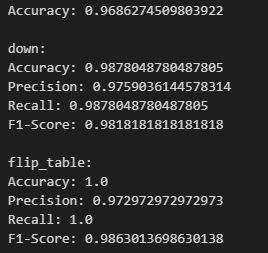 | 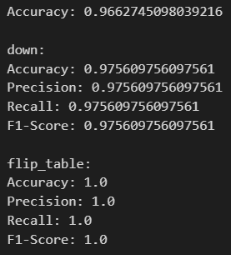  |
| 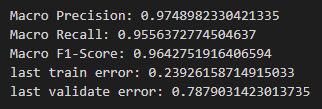| 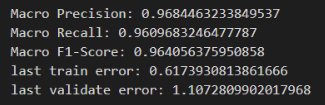|
| 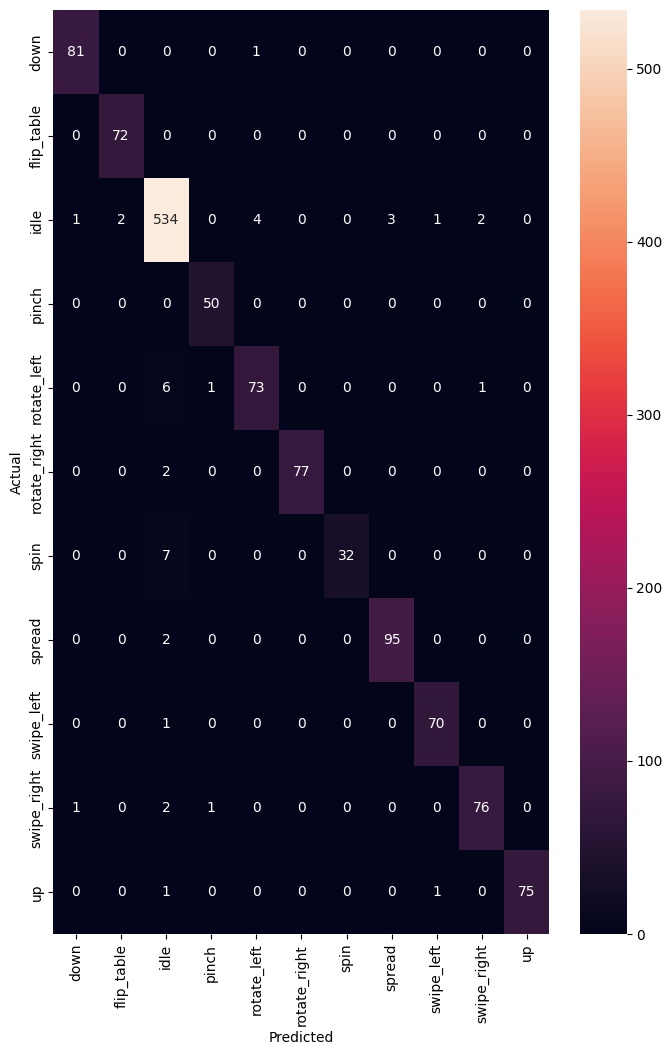 | 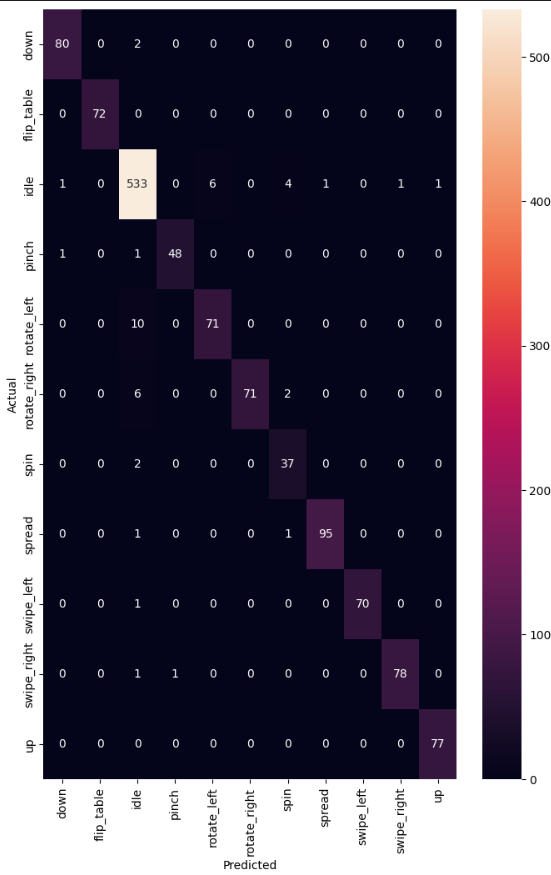 |

last train error: 0.23926158714915033
last validate error: 0.7879031423013735


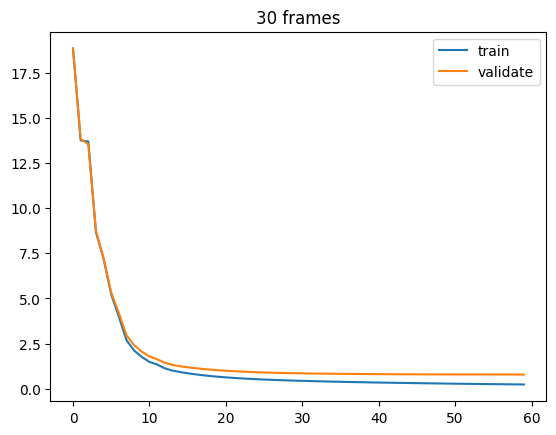

In [11]:
plot_learning_curve(error_history, error_history_validate, title=f"30 frames")

The outcomes of both models are rather similar, which indicates that we could cut down the features even more. Since it is not necessary, we prefer to keep more information since the live mode may work better that way.

#### All (99) Features

In [ ]:
layers_size = [2970, 76, 38, 11]

neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train_max, y_train_max, 0.0004, 600, 0.0005, X_validate_max, y_validate_max)
print_metrics(neural_net, X_validate_max, y_validate_max)

print(f"last train error: {error_history[-1]}")
print(f"last validate error: {error_history_validate[-1]}")

| 99 (all) Features  | 15 Features (previous) |
|---|---|
| 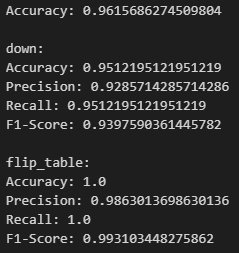| 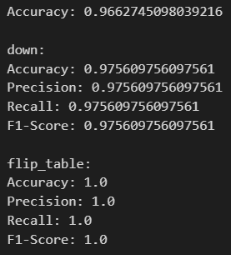 |
| 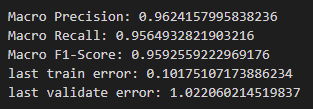| 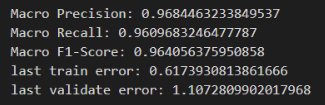|
| 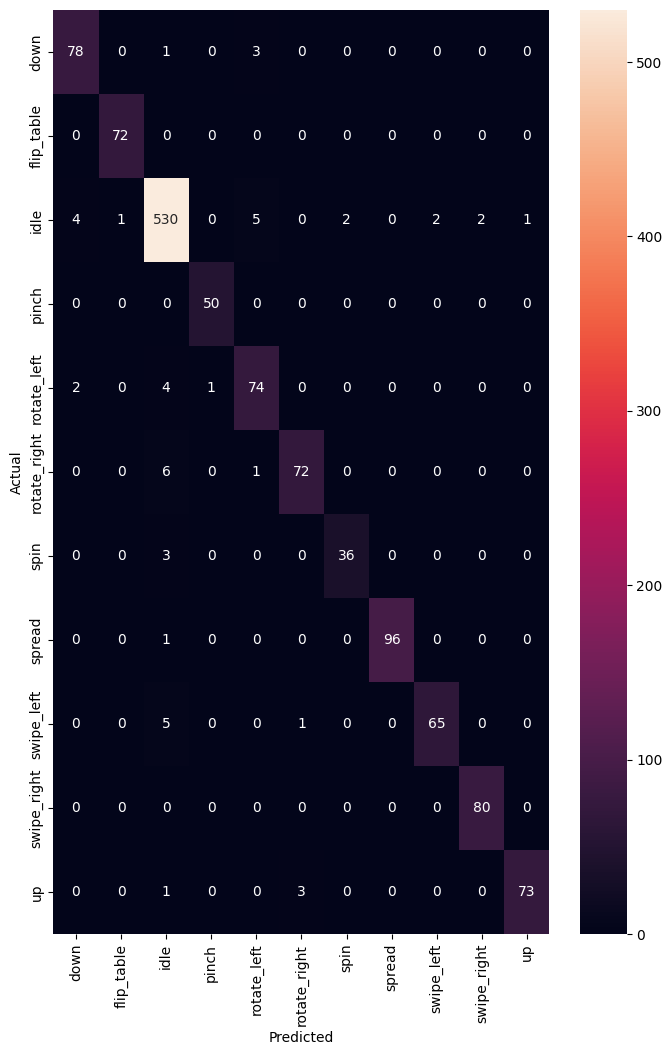 | 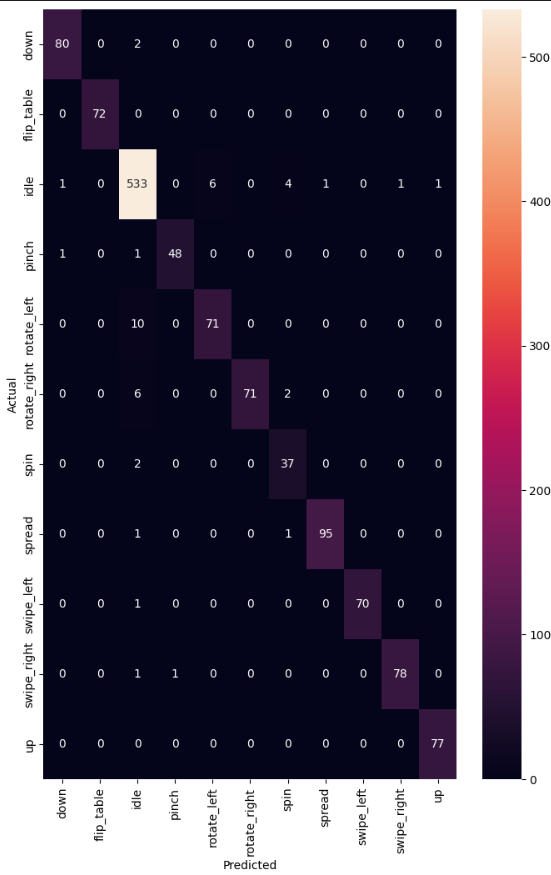 |

last train error: 0.10175107173886234
last validate error: 1.022060214519837


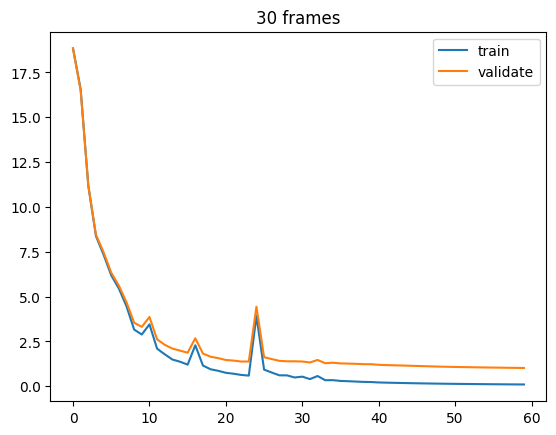

In [14]:
plot_learning_curve(error_history, error_history_validate, title=f"30 frames")

Using all the features yields very similar results to using our selected 15 features only. This is a very good result since it shows that our feature selection of 15 features works just as well as 99 features. Thus we can conclude, that we picked very good features and are not losing any valuable information when cutting them down. If we look at the error curve we also see more bumps than usual which could indicate that the increased noise in the data makes it more difficult to find a minimum.

#### Subtracting Features
Here we now try to subtract features from one another. We base this off of our perviously used 15 features but chose to include the x and y values of the shoulders as well for convenience.

This way we now calculated four different subtractions:

* Thumb - shoulders (Left and Right, with x y and z)
* Thumb - ellbow (Left and Right, with x y and z)
* Thumb Left - Thumb Right (For x y and z)
* Elbow left - elbow right (For x y and z)

We also decided to keep the feature "right_mouth_z" since it has proven useful. We chose these combination, since we expect the most differences between those features. Take for example the gesture rotate: The distance between shoulder and thumb is different throughout the movement. For swipe, there is more difference between ellbow and thumb. The difference between left and right seemed useful, since many gestures only use one of either hands.

In [ ]:
layers_size = [570, 76, 38, 11]

neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train_sub, y_train_sub, 0.0004, 600, 0.0005, X_validate_sub, y_validate_sub)
print_metrics(neural_net, X_validate_sub, y_validate_sub)

print(f"last train error: {error_history[-1]}")
print(f"last validate error: {error_history_validate[-1]}")

| Subtracted Features  | 15 Features (previous) |
|---|---|
|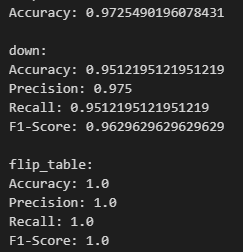 | 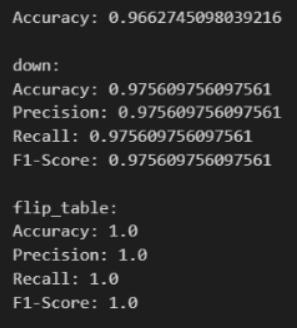 |
| 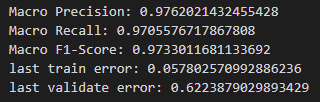| 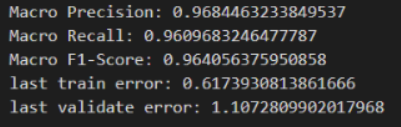|
| 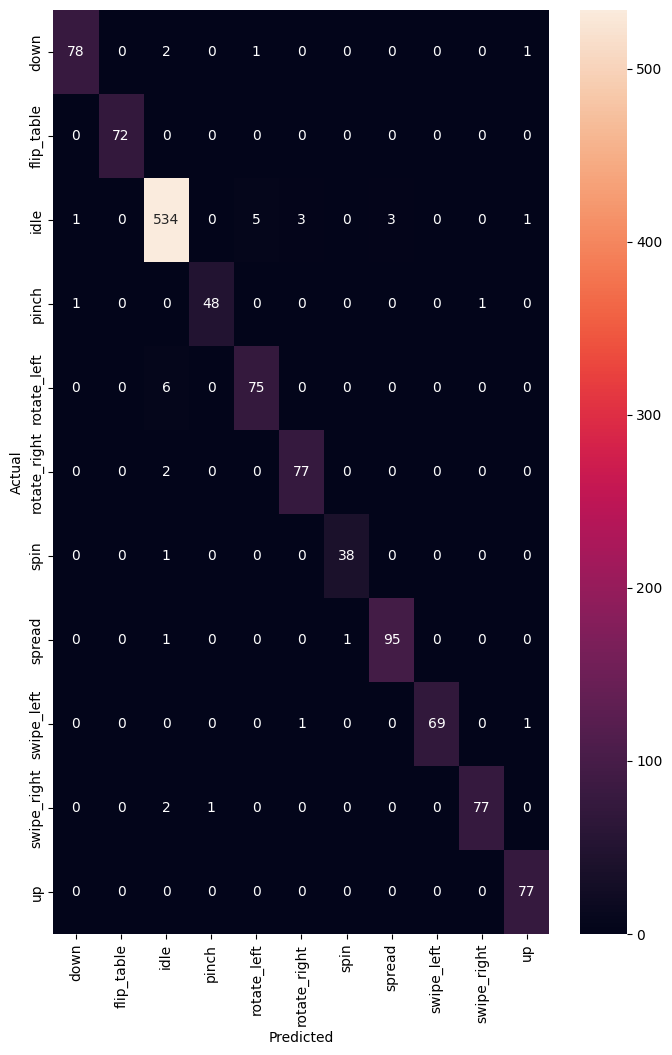| 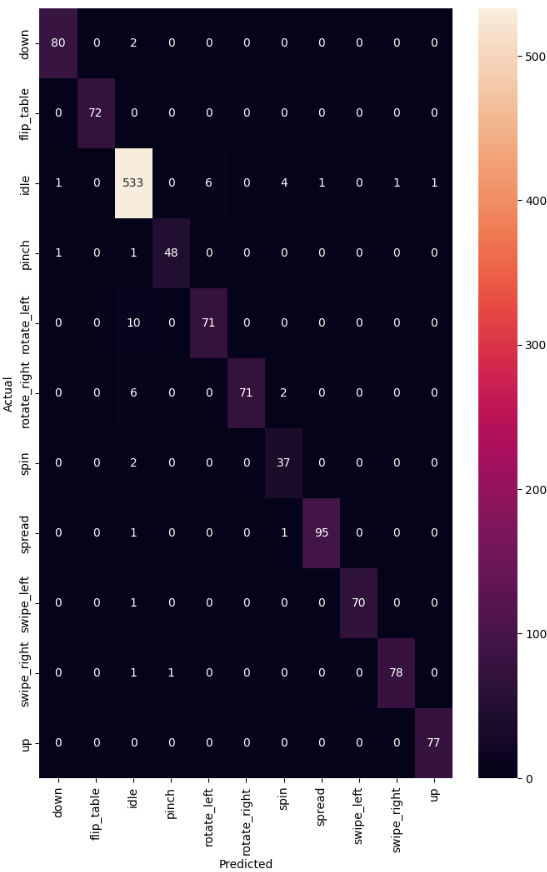 |

last train error: 0.057802570992886236
last validate error: 0.6223879029893429


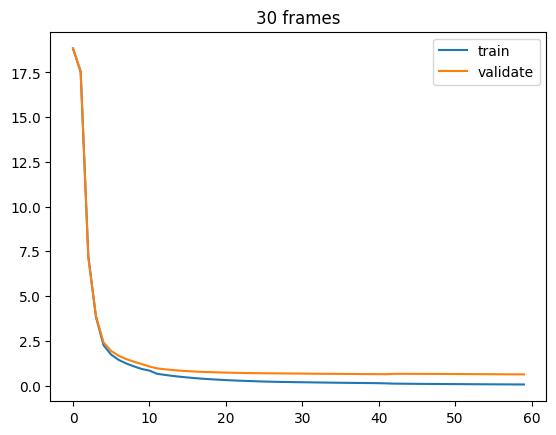

In [12]:
plot_learning_curve(error_history, error_history_validate, title=f"30 frames")

The results here seem to be slightly better than those of the raw features. That means combining them may actually provide advantages for our model!
#### Adding Features
We now add the features in the same way we subtracted them beforehand.

In [ ]:
layers_size = [570, 76, 38, 11]

neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train_add, y_train_add, 0.0004, 600, 0.0005, X_validate_add, y_validate_add)
print_metrics(neural_net, X_validate_add, y_validate_add)

print(f"last train error: {error_history[-1]}")
print(f"last validate error: {error_history_validate[-1]}")

| Added Features  | 15 Features (previous) |
|---|---|
| 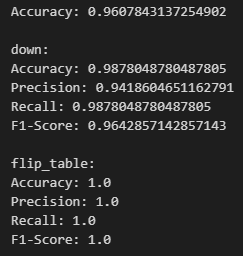 |  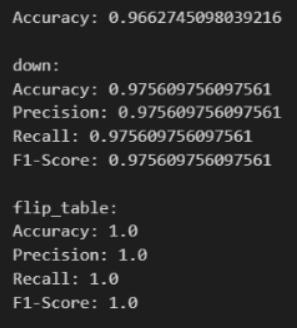|
| 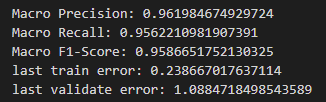 | 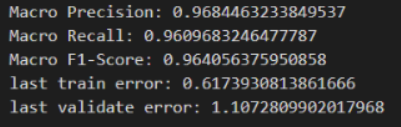|
| 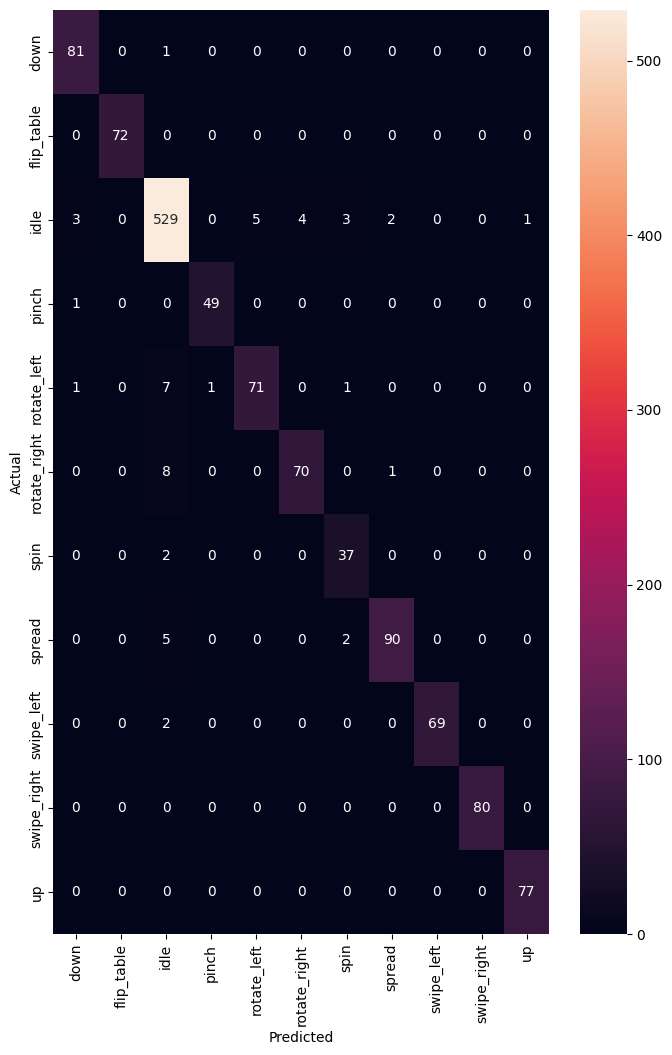 | 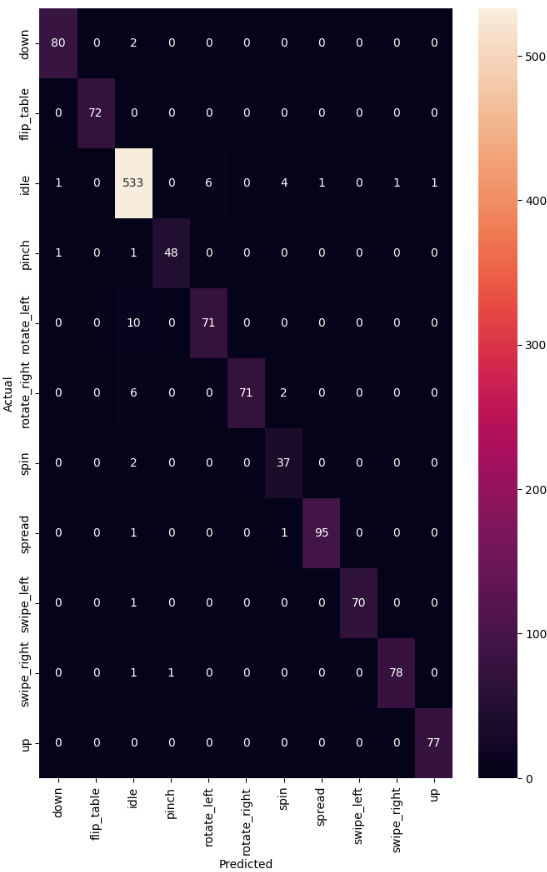 |

last train error: 0.238667017637114
last validate error: 1.0884718498543589


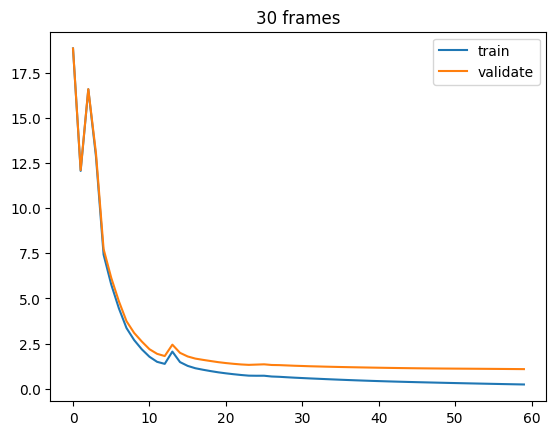

In [19]:
plot_learning_curve(error_history, error_history_validate, title=f"30 frames")

The results for the added features seem to produce similar but slightly worse results than using the 15 features as they are. We can also see that the error graph again has quite some bumps, which could mean that the model struggled to converge with the added features.

#### Multiplied Features
Now we tried multiplying the features with one another in the same way we subtracted and added them before.

In [ ]:
layers_size = [570, 76, 38, 11]

neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train_mul, y_train_mul, 0.0004, 600, 0.0005, X_validate_mul, y_validate_mul)
print_metrics(neural_net, X_validate_mul, y_validate_mul)

print(f"last train error: {error_history[-1]}")
print(f"last validate error: {error_history_validate[-1]}")

| Multiplied Features  | 15 Features (previous) |
|---|---|
| 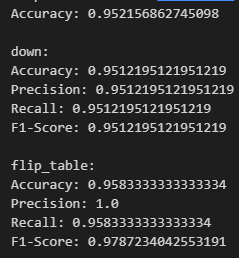 | 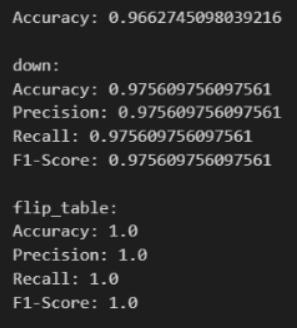 |
| 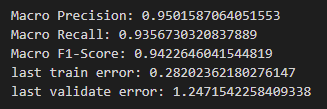| 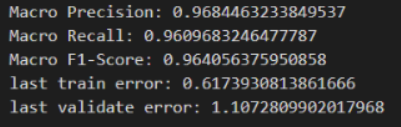|
| 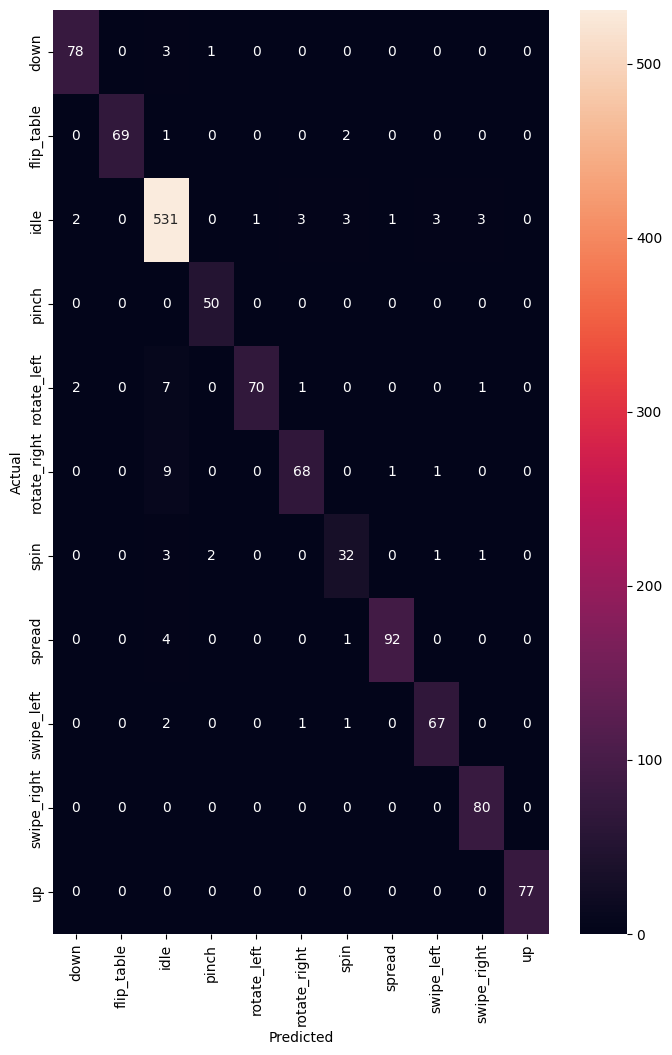 | 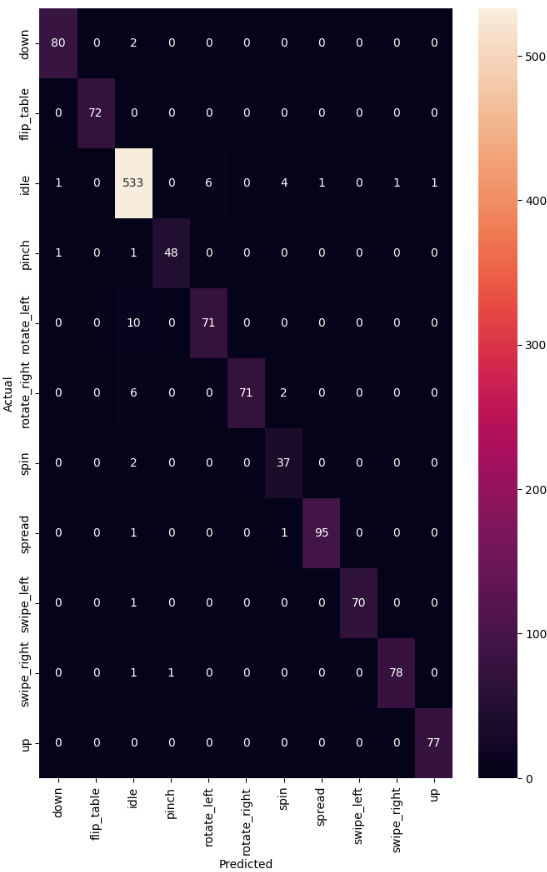 |

last train error: 0.28202362180276147
last validate error: 1.2471542258409338


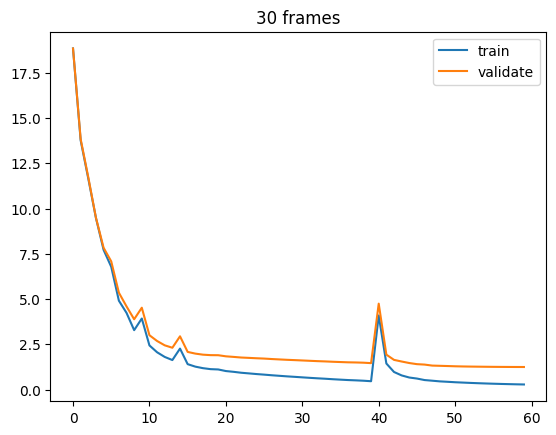

In [21]:
plot_learning_curve(error_history, error_history_validate, title=f"30 frames")

Again, the model does perform slightly worse than the one using 15 features. As before with the added features, the error graph has quite some spikes indicating a struggle to converge.

Looking at all the types of features we tested, the best one seems to be subtracting the features from one another. Although using the previously selected 15 features produces very similar and only slightly worse results. It would be a good alternative as well.

# Creating the final models
With the results collected beforehand, we now train our final models
### Live mode

Accuracy: 0.9749019607843137

down: 
Accuracy: 0.975609756097561
Precision: 1.0
Recall: 0.975609756097561
F1-Score: 0.9876543209876543

flip_table: 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

idle: 
Accuracy: 0.9762340036563071
Precision: 0.9761904761904762
Recall: 0.9744058500914077
F1-Score: 0.9752973467520586

pinch: 
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-Score: 0.98

rotate_left: 
Accuracy: 0.9135802469135802
Precision: 0.9487179487179487
Recall: 0.9135802469135802
F1-Score: 0.9308176100628931

rotate_right: 
Accuracy: 0.9746835443037974
Precision: 0.9625
Recall: 0.9746835443037974
F1-Score: 0.9685534591194969

spin: 
Accuracy: 0.9743589743589743
Precision: 0.926829268292683
Recall: 0.9743589743589743
F1-Score: 0.9500000000000001

spread: 
Accuracy: 0.9896907216494846
Precision: 0.9696969696969697
Recall: 0.9896907216494846
F1-Score: 0.9795918367346939

swipe_left: 
Accuracy: 0.9859154929577465
Precision: 0.9859154929577465
Recall: 0.9859154929577465
F1-Score:

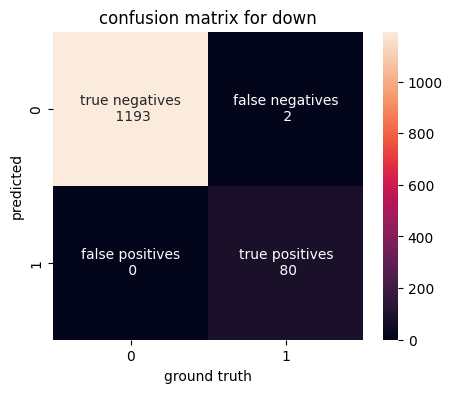

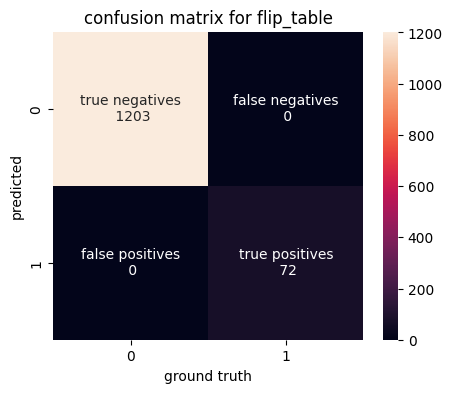

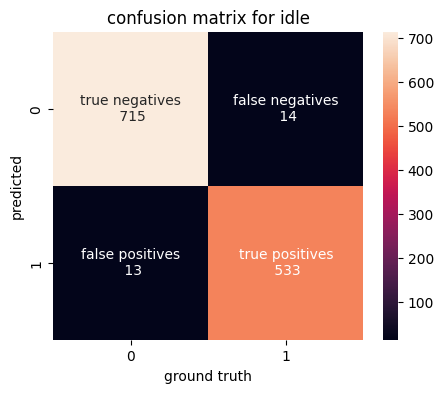

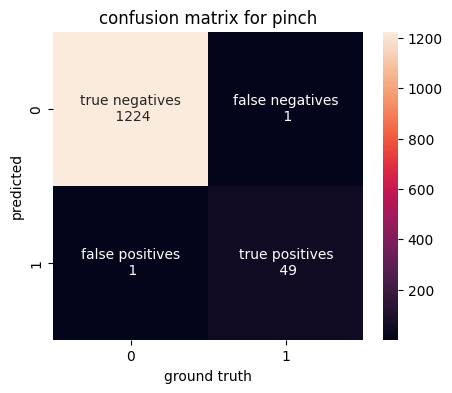

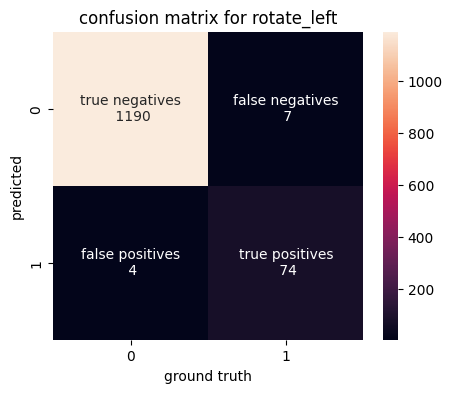

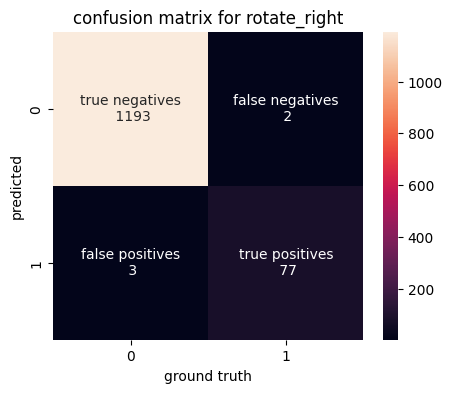

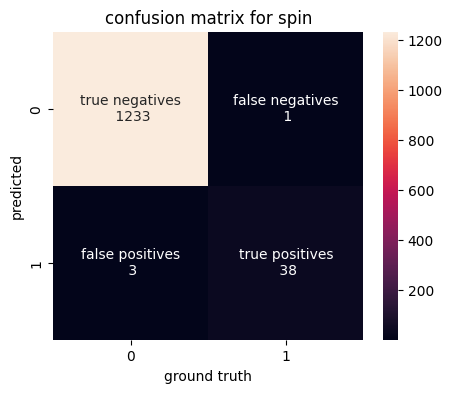

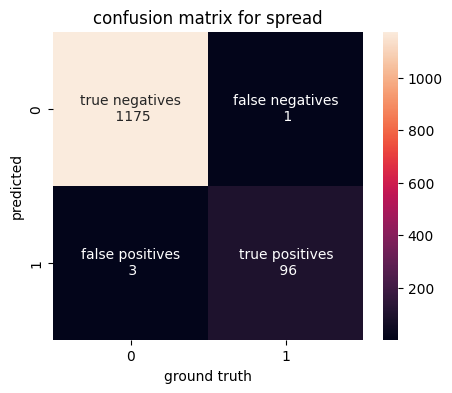

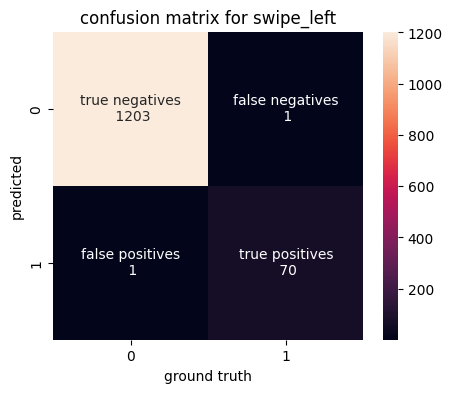

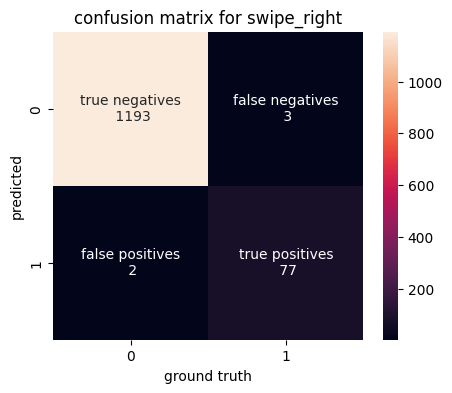

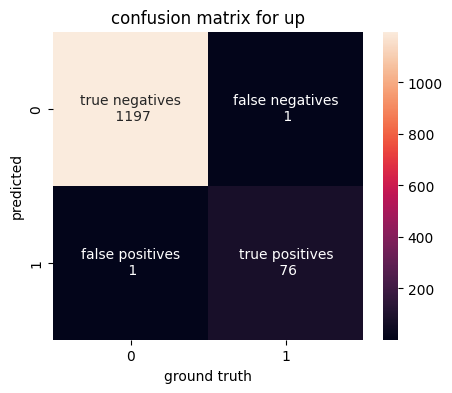

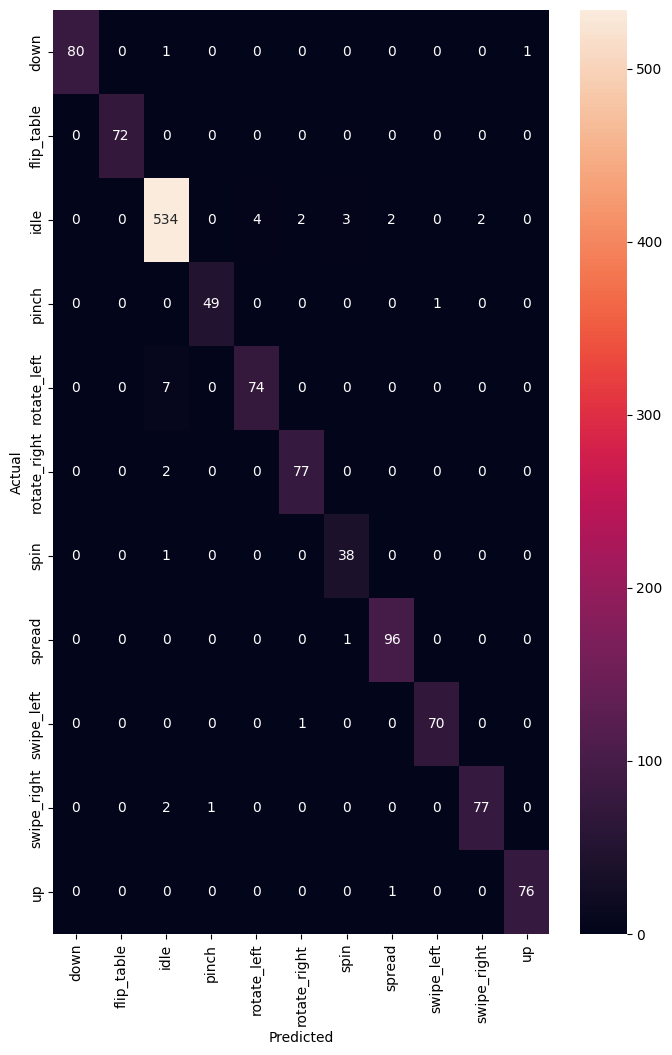

In [9]:
X_train_sub, X_validate_sub, X_test_sub, y_train_sub, y_validate_sub, y_test_sub = read_data("sub_features/")
layers_size = [570, 76, 38, 11]

neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train_sub, y_train_sub, 0.0004, 600, 0.0005, X_validate_sub, y_validate_sub)
print_metrics(neural_net, X_validate_sub, y_validate_sub)
print(f"last train error: {error_history[-1]}")
print(f"last validate error: {error_history_validate[-1]}")

Here are the results of the ``test dataset``.

Accuracy: 0.9748822605965463

down: 
Accuracy: 0.9634146341463414
Precision: 0.9518072289156626
Recall: 0.9634146341463414
F1-Score: 0.9575757575757576

flip_table: 
Accuracy: 1.0
Precision: 0.9861111111111112
Recall: 1.0
F1-Score: 0.993006993006993

idle: 
Accuracy: 0.9725776965265083
Precision: 0.9743589743589743
Recall: 0.9725776965265083
F1-Score: 0.9734675205855443

pinch: 
Accuracy: 0.9607843137254902
Precision: 1.0
Recall: 0.9607843137254902
F1-Score: 0.98

rotate_left: 
Accuracy: 0.9876543209876543
Precision: 0.9523809523809523
Recall: 0.9876543209876543
F1-Score: 0.9696969696969696

rotate_right: 
Accuracy: 0.9358974358974359
Precision: 0.948051948051948
Recall: 0.9358974358974359
F1-Score: 0.9419354838709677

spin: 
Accuracy: 0.975
Precision: 0.975
Recall: 0.975
F1-Score: 0.975

spread: 
Accuracy: 0.979381443298969
Precision: 0.979381443298969
Recall: 0.979381443298969
F1-Score: 0.979381443298969

swipe_left: 
Accuracy: 0.9859154929577465
Precision: 1.0
Recall: 0.985915492957

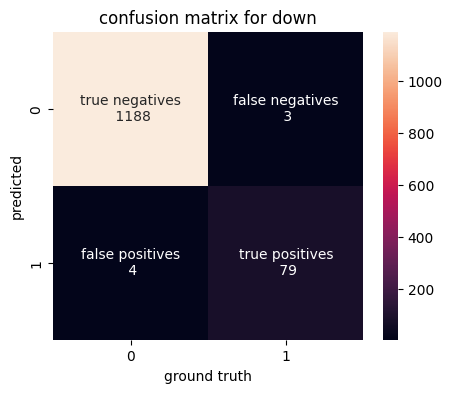

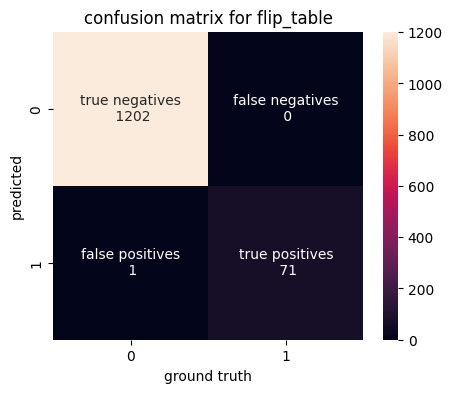

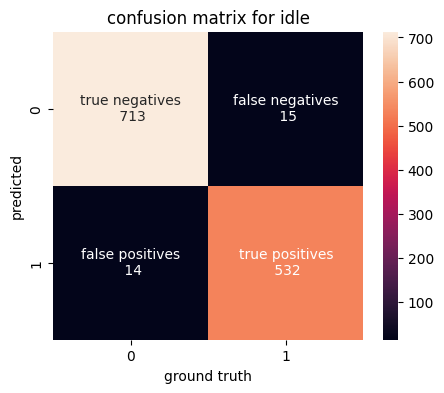

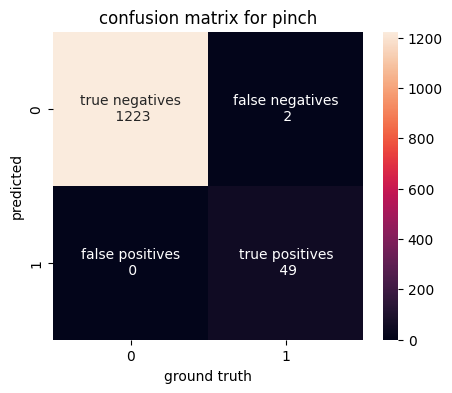

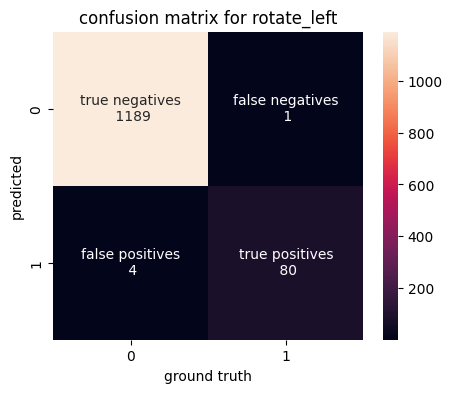

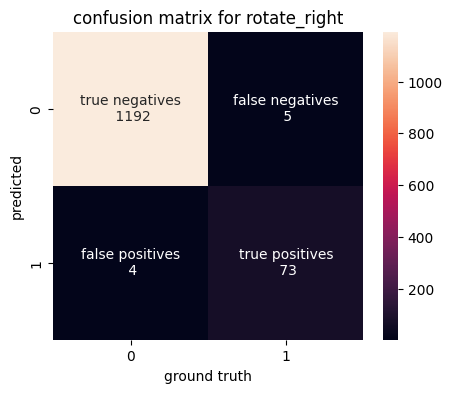

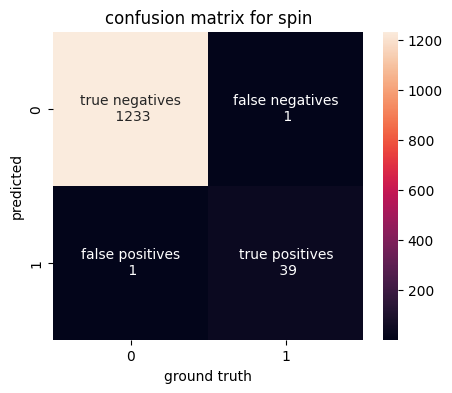

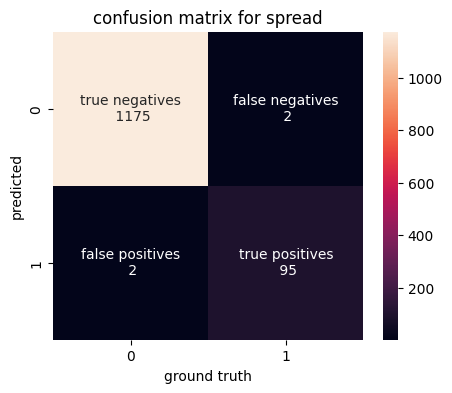

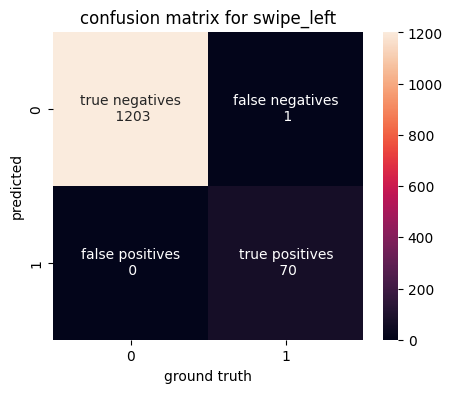

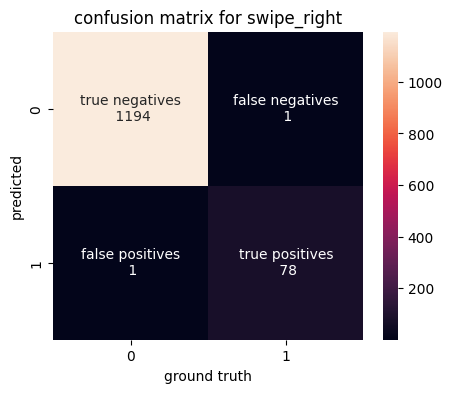

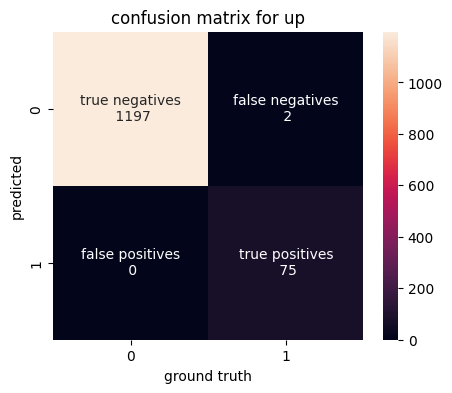

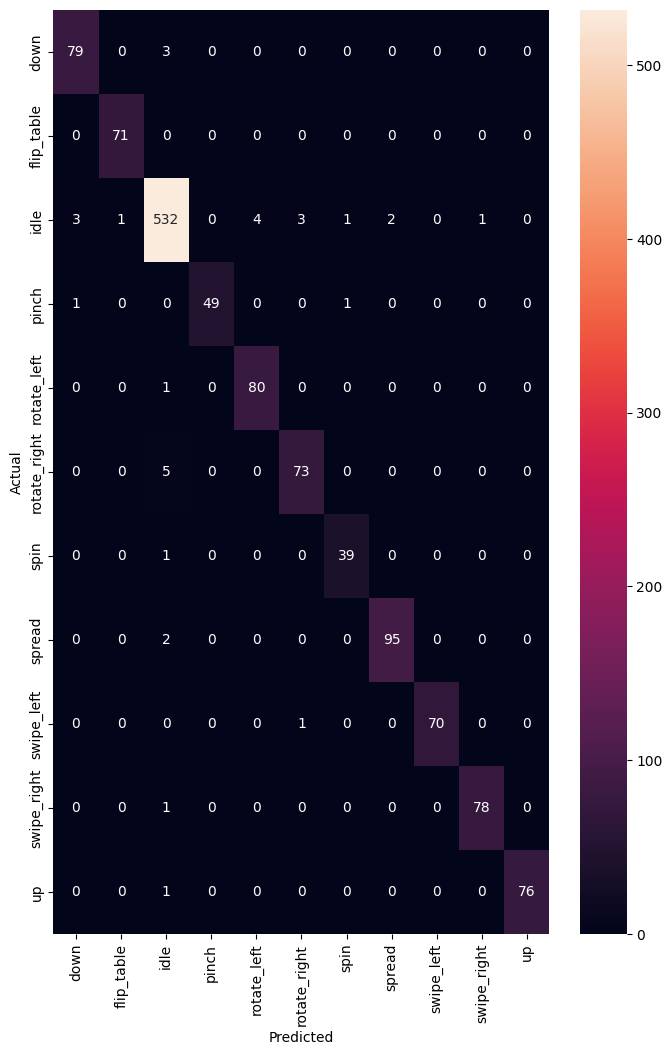

In [11]:
print_metrics(neural_net, X_test_sub, y_test_sub)

As we can see there are no big differences between the validation and the test datasets. So we can have confidence that our model will predict the gestures mostly correctly.

In [15]:
# export the best guess
np.savez('weights', w0=weights[0], w1=weights[1], w2=weights[2])
np.savez('biases', b0=biases[0], b1=biases[1], b2=biases[2])

### Test Mode

For the test mode we will use a seperate model that is specialized to recognize the gestures "rotate", "swipe_left" and "swipe_right" only. We decided to use 15 Frames again here, since it yields better results.

Accuracy: 0.9854014598540146

idle: 
Accuracy: 0.9882352941176471
Precision: 0.9710982658959537
Recall: 0.9882352941176471
F1-Score: 0.9795918367346939

rotate: 
Accuracy: 0.986013986013986
Precision: 0.986013986013986
Recall: 0.986013986013986
F1-Score: 0.986013986013986

swipe_left: 
Accuracy: 0.96
Precision: 1.0
Recall: 0.96
F1-Score: 0.9795918367346939

swipe_right: 
Accuracy: 1.0
Precision: 0.9926470588235294
Recall: 1.0
F1-Score: 0.996309963099631

Macro Precision: 0.9874398276833672
Macro Recall: 0.9835623200329082
Macro F1-Score: 0.9853769056457513
last train error: 0.10499934846071306
last validate error: 0.44083621801442147


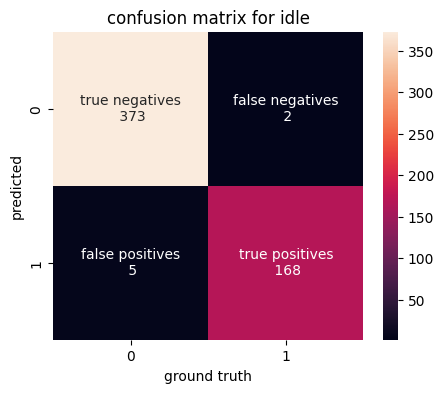

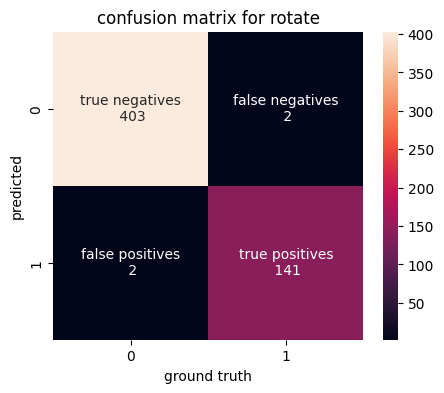

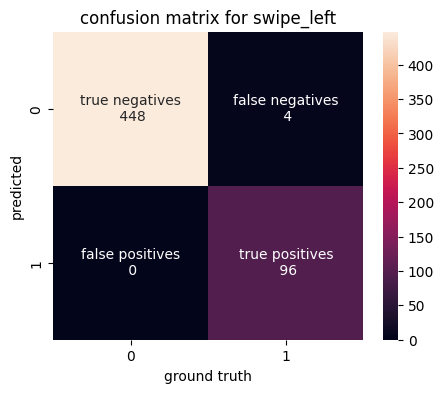

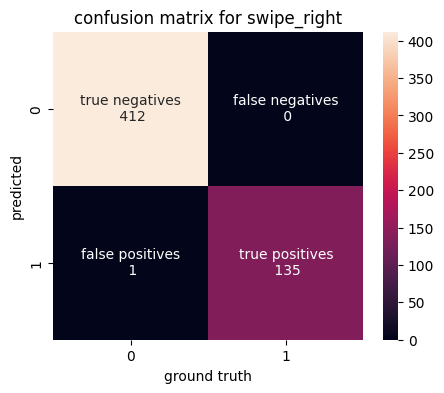

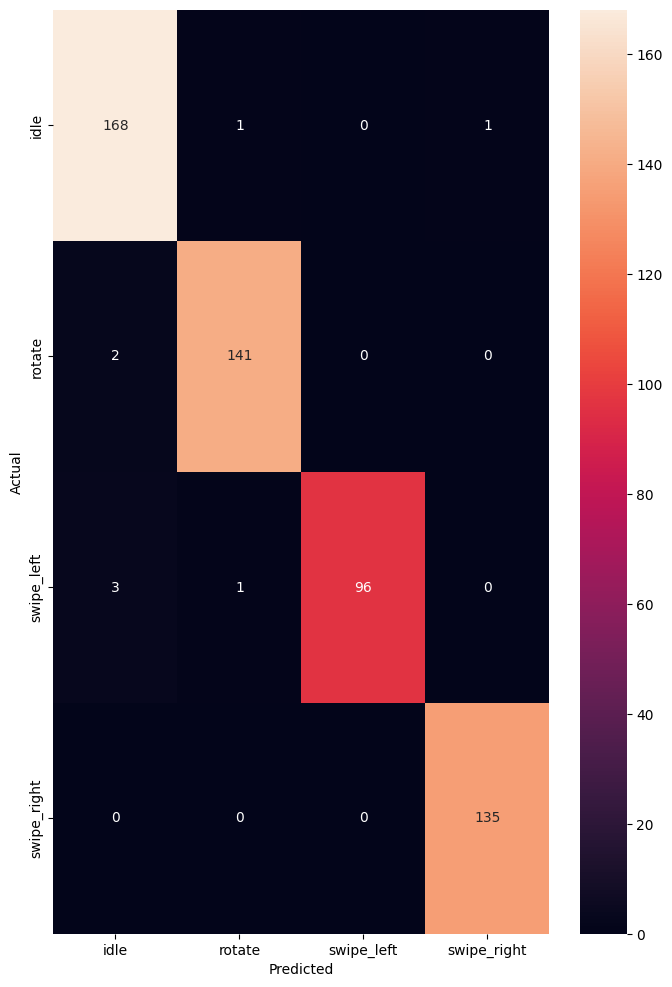

In [5]:
X_train, X_validate, X_test, y_train, y_validate, y_test = read_data("test_mode_15/")
layers_size = [285, 76, 38, 4]

neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION, tanh, gradient_descent)
weights, biases, error_history,error_history_validate = neural_net.train(X_train, y_train, 0.0004, 600, 0.0005, X_validate, y_validate)
print_metrics(neural_net, X_validate, y_validate)

print(f"last train error: {error_history[-1]}")
print(f"last validate error: {error_history_validate[-1]}")

Here are the results of the ``test dataset``.

Accuracy: 0.9690909090909091

idle: 
Accuracy: 0.9647058823529412
Precision: 0.9425287356321839
Recall: 0.9647058823529412
F1-Score: 0.9534883720930232

rotate: 
Accuracy: 0.986013986013986
Precision: 1.0
Recall: 0.986013986013986
F1-Score: 0.9929577464788732

swipe_left: 
Accuracy: 0.9603960396039604
Precision: 0.9897959183673469
Recall: 0.9603960396039604
F1-Score: 0.9748743718592964

swipe_right: 
Accuracy: 0.9632352941176471
Precision: 0.9632352941176471
Recall: 0.9632352941176471
F1-Score: 0.9632352941176471

Macro Precision: 0.9738899870292945
Macro Recall: 0.9685878005221337
Macro F1-Score: 0.97113894613721


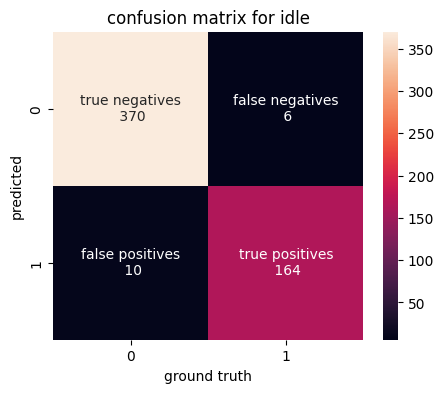

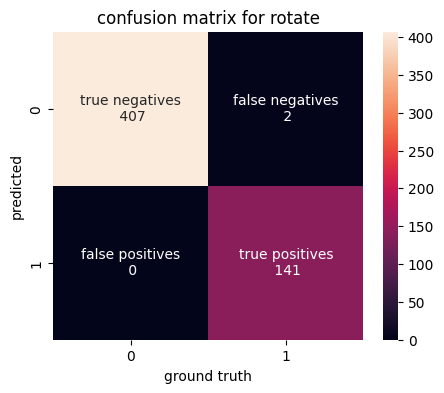

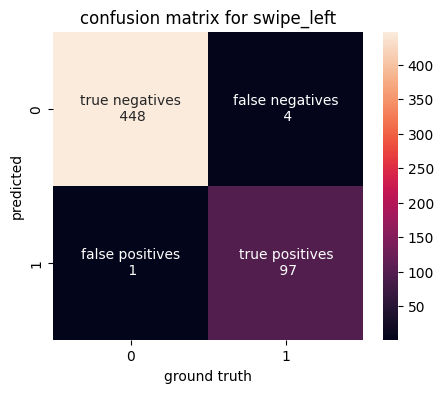

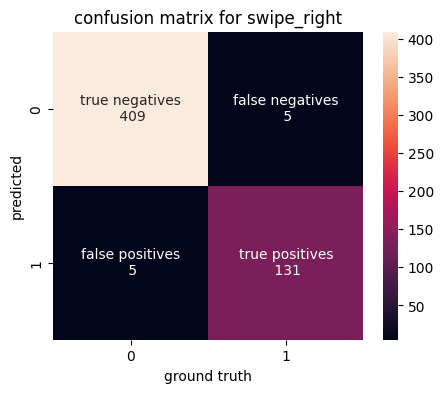

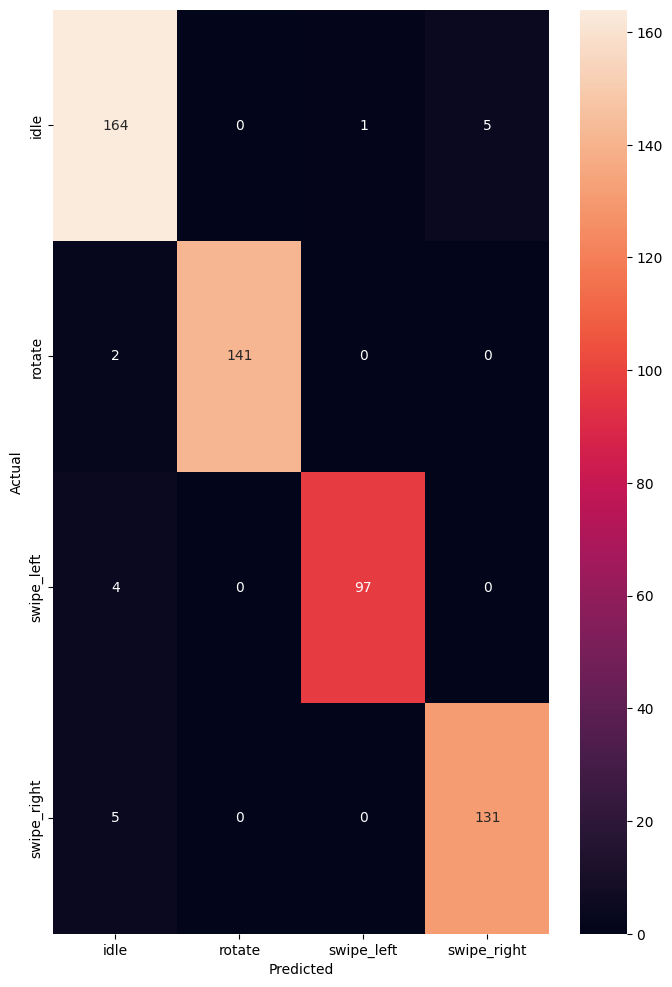

In [6]:
print_metrics(neural_net, X_test, y_test)

As we can see there are no big differences between the validation and the test datasets. So we can have confidence that our model will predict the gestures mostly correctly.

In [ ]:
np.savez('weights_test', w0=weights[0], w1=weights[1], w2=weights[2])
np.savez('biases_test', b0=biases[0], b1=biases[1], b2=biases[2])